# ความสัมพันธ์ของ GDP per capita และ ตลาดหุ้น

In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}" ) 

Python 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
Pandas 1.4.2
NumPy 1.21.5


In [2]:
#import data stock by country
df_stock = pd.read_csv('/Users/planjeera/Downloads/Index_country.csv')  
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     151 non-null    object 
 1   name        151 non-null    object 
 2   1/1/2007    141 non-null    float64
 3   31/12/2007  143 non-null    float64
 4   1/1/2008    143 non-null    float64
 5   31/12/2008  147 non-null    float64
 6   1/1/2009    147 non-null    float64
 7   31/12/2009  147 non-null    float64
 8   1/1/2010    147 non-null    float64
 9   31/12/2010  149 non-null    float64
 10  1/1/2011    149 non-null    float64
 11  31/12/2011  149 non-null    float64
 12  1/1/2012    149 non-null    float64
 13  31/12/2012  149 non-null    float64
 14  1/1/2013    149 non-null    float64
 15  31/12/2013  151 non-null    float64
 16  1/1/2014    151 non-null    float64
 17  31/12/2014  151 non-null    float64
 18  1/1/2015    151 non-null    float64
 19  31/12/2015  151 non-null    f

In [3]:
#import name by country
df_name = pd.read_csv('/Users/planjeera/Downloads/csvData.csv')
df_name['country'] = df_name['country'].str.lower()
df_name = df_name.drop(['area','pop2022'],axis=1)
df_name

country         region           subregion
0               china           Asia        Eastern Asia
1               india           Asia       Southern Asia
2       united states  North America    Northern America
3           indonesia           Asia  South-Eastern Asia
4            pakistan           Asia       Southern Asia
..                ...            ...                 ...
229        montserrat  North America           Caribbean
230  falkland islands  South America       South America
231              niue        Oceania           Polynesia
232           tokelau        Oceania           Polynesia
233      vatican city         Europe     Southern Europe

[234 rows x 3 columns]

In [4]:
#import data GDPP by country
df_gdp = pd.read_csv('/Users/planjeera/Downloads/GDPP.csv')  
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            133 non-null    float64
 5   1961            135 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            155 non-null    float64
 12  1968            160 non-null    float64
 13  1969            160 non-null    float64
 14  1970            169 non-null    float64
 15  1971            172 non-null    float64
 16  1972            172 non-null    float64
 17  1973            172 non-null    flo

In [5]:
#clean data GDPP
df_gdp['Country Name'] = df_gdp['Country Name'].str.lower()
df_gdp = df_gdp.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
df_gdp = df_gdp.fillna(0)
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   1960          266 non-null    float64
 2   1961          266 non-null    float64
 3   1962          266 non-null    float64
 4   1963          266 non-null    float64
 5   1964          266 non-null    float64
 6   1965          266 non-null    float64
 7   1966          266 non-null    float64
 8   1967          266 non-null    float64
 9   1968          266 non-null    float64
 10  1969          266 non-null    float64
 11  1970          266 non-null    float64
 12  1971          266 non-null    float64
 13  1972          266 non-null    float64
 14  1973          266 non-null    float64
 15  1974          266 non-null    float64
 16  1975          266 non-null    float64
 17  1976          266 non-null    float64
 18  1977          266 non-null    

In [6]:
#find %change
year = 2005
while year <= 2019:
    df_gdp[int(year)+2] = df_gdp[[f'{int(year)+1}',f'{int(year)}']].apply(lambda x: ((x[f'{int(year)+1}']- x[f'{int(year)}'])/x[f'{int(year)}']*100) , axis=1)
    year+=1
df_gdp

/var/folders/r2/z52gb1f13kd2k3v2nyjr4hn00000gn/T/ipykernel_7477/3478735977.py:4: RuntimeWarning: invalid value encountered in double_scalars
  df_gdp[int(year)+2] = df_gdp[[f'{int(year)+1}',f'{int(year)}']].apply(lambda x: ((x[f'{int(year)+1}']- x[f'{int(year)}'])/x[f'{int(year)}']*100) , axis=1)
/var/folders/r2/z52gb1f13kd2k3v2nyjr4hn00000gn/T/ipykernel_7477/3478735977.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  df_gdp[int(year)+2] = df_gdp[[f'{int(year)+1}',f'{int(year)}']].apply(lambda x: ((x[f'{int(year)+1}']- x[f'{int(year)}'])/x[f'{int(year)}']*100) , axis=1)
/var/folders/r2/z52gb1f13kd2k3v2nyjr4hn00000gn/T/ipykernel_7477/3478735977.py:4: RuntimeWarning: invalid value encountered in double_scalars
  df_gdp[int(year)+2] = df_gdp[[f'{int(year)+1}',f'{int(year)}']].apply(lambda x: ((x[f'{int(year)+1}']- x[f'{int(year)}'])/x[f'{int(year)}']*100) , axis=1)
/var/folders/r2/z52gb1f13kd2k3v2nyjr4hn00000gn/T/ipykernel_7477/3478735977.py:4: RuntimeWarning: invalid 

Country Name        1960        1961        1962  \
0                          aruba    0.000000    0.000000    0.000000   
1    africa eastern and southern  162.726326  162.555968  172.271022   
2                    afghanistan   59.773234   59.860900   58.458009   
3     africa western and central  107.930722  113.080062  118.829461   
4                         angola    0.000000    0.000000    0.000000   
..                           ...         ...         ...         ...   
261                       kosovo    0.000000    0.000000    0.000000   
262                  yemen, rep.    0.000000    0.000000    0.000000   
263                 south africa  511.618737  526.461750  546.261935   
264                       zambia  232.188565  220.042067  212.578449   
265                     zimbabwe  278.813847  280.828663  276.688233   

           1963        1964        1965        1966        1967        1968  \
0      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1    199.784916  180.228774  199.517227  211.054388  213.636599  226.621320   
2     78.706429   82.095307  101.108325  137.594298  160.898434  129.108311   
3    123.441090  131.852423  138.524029  144.323882  128.578957  129.641093   
4      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
..          ...         ...         ...         ...         ...         ...   
261    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
262    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
263  589.160460  632.716104  674.186433  714.562010  775.297687  817.719079   
264  213.896759  242.384472  303.281741  343.373670  360.201239  409.775349   
265  277.479715  281.558896  293.308788  277.234532  292.270533  299.398936   

     ...       2012       2013       2014      2015       2016       2017  \
0    ...   7.108049  -1.366037   3.708627  1.711758   5.592079   0.192490   
1    ...   9.072623  -1.818842  -1.597833 -0.724074 -10.362941  -7.054018   
2    ...   8.813350   8.060999  -2.274476 -1.616508  -9.478005  -7.912567   
3    ...  10.356587   5.517213   9.789695  2.568698 -14.396943 -11.638909   
4    ...  29.169420  10.183470   2.998589 -0.655358 -38.597926 -44.754342   
..   ...        ...        ...        ...       ...        ...        ...   
261  ...  17.654826  -3.672295   8.617312  5.341520  -9.785838   6.782438   
262  ...   2.984488   5.231627  11.103467  4.159556  -4.312742 -28.035156   
263  ...   8.123360  -6.681852  -9.183897 -6.405054 -10.430519  -8.033336   
264  ...  12.316448   5.389533   6.538447 -6.171331 -24.065490  -4.295358   
265  ...  15.323959  19.321899   9.581112  0.342505   0.709001   1.350748   

          2018       2019       2020       2021  
0     3.144417   3.084647   2.915907 -24.895987  
1    12.641991  -5.423615  -1.928734  -9.953662  
2     0.911517  -6.002062   1.752416   4.566868  
3    -3.605665   5.617958   4.325778  -3.829827  
4    33.865092   9.152690 -13.748569 -25.088051  
..         ...        ...        ...        ...  
261   6.644946   9.344782   0.731275  -2.384388  
262 -16.343495 -21.381911  -1.001307 -15.838034  
263  16.223374   4.695238  -5.429384 -14.625344  
264  19.861706  -1.226436 -13.939050 -24.510984  
265 -15.663093   1.574920   4.949490  -7.763931  

[266 rows x 78 columns]

In [7]:
df_gdp.drop(df_gdp.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62]], axis=1, inplace=True) 
df_gdp.dropna()

Country Name       2007       2008       2009        2010  \
0                          aruba   3.831332   7.990265   6.033214  -10.258499   
1    africa eastern and southern   9.497459  11.782055   4.288129   -1.159742   
2                    afghanistan   8.966728  36.385032   1.381840   19.910188   
3     africa western and central  23.230597  14.227497  19.331267  -12.927401   
4                         angola  36.645063  20.096822  30.715763  -23.478881   
..                           ...        ...        ...        ...         ...   
260                        samoa   4.181591  13.989210  11.073323   -2.760741   
262                  yemen, rep.  10.635141  10.405012  20.835180   -9.205823   
263                 south africa   3.869196   8.207896  -6.344775    2.867174   
264                       zambia  49.118760   7.287944  23.989342  -16.792892   
265                     zimbabwe  -6.022524  -3.587655 -17.391441  116.320064   

          2011       2012       2013       2014      2015       2016  \
0    -4.117299   7.108049  -1.366037   3.708627  1.711758   5.592079   
1    16.441912   9.072623  -1.818842  -1.597833 -0.724074 -10.362941   
2    24.250027   8.813350   8.060999  -2.274476 -1.616508  -9.478005   
3    13.511536  10.356587   5.517213   9.789695  2.568698 -14.396943   
4    12.014696  29.169420  10.183470   2.998589 -0.655358 -38.597926   
..         ...        ...        ...        ...       ...        ...   
260   4.807988  10.290348   2.255482   0.388747 -2.492131   3.468030   
262  19.595338   2.984488   5.231627  11.103467  4.159556  -4.312742   
263  24.740384   8.123360  -6.681852  -9.183897 -6.405054 -10.430519   
264  28.411885  12.316448   5.389533   6.538447 -6.171331 -24.065490   
265  22.904701  15.323959  19.321899   9.581112  0.342505   0.709001   

          2017       2018       2019       2020       2021  
0     0.192490   3.144417   3.084647   2.915907 -24.895987  
1    -7.054018  12.641991  -5.423615  -1.928734  -9.953662  
2    -7.912567   0.911517  -6.002062   1.752416   4.566868  
3   -11.638909  -3.605665   5.617958   4.325778  -3.829827  
4   -44.754342  33.865092   9.152690 -13.748569 -25.088051  
..         ...        ...        ...        ...        ...  
260   0.882096   3.633275  -1.678193   3.232561  -5.893993  
262 -28.035156 -16.343495 -21.381911  -1.001307 -15.838034  
263  -8.033336  16.223374   4.695238  -5.429384 -14.625344  
264  -4.295358  19.861706  -1.226436 -13.939050 -24.510984  
265   1.350748 -15.663093   1.574920   4.949490  -7.763931  

[250 rows x 16 columns]

In [8]:
df_gdp = df_gdp.melt(id_vars=["Country Name"], 
        var_name="year", 
        value_name="GDPP")
df_gdp.columns =['country' , 'year' ,'GDPP' ]
data_types_dict = {'year': int}
df_gdp = df_gdp.astype(data_types_dict)

In [9]:
#clean data stock market
df_stock['country'] = df_stock['country'].str.lower()
df_stock = df_stock.drop(['name'],axis=1)
df_stock = df_stock.fillna(0)
df_stock

country  1/1/2007  31/12/2007  1/1/2008  31/12/2008  1/1/2009  \
0          thailand    679.84      858.10    858.10      449.96    449.96   
1            france   7801.43     7652.11   7652.11     4422.23   4422.23   
2            france  17225.83    15307.78  15307.78     8859.56   8859.56   
3         australia   5644.30     6421.00   6421.00     3659.30   3659.30   
4         australia   5676.50     6356.70   6356.70     3704.10   3704.10   
..              ...       ...         ...       ...         ...       ...   
146  united kingdom   3905.60     3420.30   3420.30     1854.22   1854.22   
147   united states   2415.29     2652.28   2652.28     1577.03   1577.03   
148   united states   1418.30     1468.36   1468.36      903.25    903.25   
149         vietnam    242.89      323.55    323.55      105.12    105.12   
150         vietnam    751.77      927.02    927.02      315.62    315.62   

     31/12/2009  1/1/2010  31/12/2010  1/1/2011  ...  1/1/2017  31/12/2017  \
0        734.54    734.54     1032.76   1032.76  ...   1542.94     1753.71   
1       6094.31   6094.31     7234.18   7234.18  ...  11925.45    14568.97   
2      10546.44  10546.44    10228.92  10228.92  ...  19114.37    22764.94   
3       4882.70   4882.70     4846.90   4846.90  ...   5719.10     6167.29   
4       4868.20   4868.20     4760.80   4760.80  ...   5617.70     6023.30   
..          ...       ...         ...       ...  ...       ...         ...   
146     2776.92   2776.92     3228.61   3228.61  ...   5143.22     5911.89   
147     2269.15   2269.15     2652.87   2652.87  ...   5383.12     6903.39   
148     1115.10   1115.10     1257.64   1257.64  ...   2238.83     2673.61   
149      168.17    168.17      114.24    114.24  ...     80.12      116.86   
150      494.77    494.77      484.66    484.66  ...    664.87      984.24   

     1/1/2018  31/12/2018  1/1/2019  31/12/2019  1/1/2020  31/12/2020  \
0     1753.71     1563.88   1563.88     1579.84   1579.84     1449.35   
1    14568.97    11579.67  11579.67    13863.92  13863.92    13472.45   
2    22764.94    20014.77  20014.77    23656.62  23656.62    27444.17   
3     6167.29     5709.40   5709.40     6802.40   6802.40     6850.61   
4     6023.30     5597.00   5597.00     6647.70   6647.70     6574.33   
..        ...         ...       ...         ...       ...         ...   
146   5911.89     5177.21   5177.21     5950.49   5950.49     6215.49   
147   6903.39     6635.28   6635.28     8972.60   8972.60    12888.28   
148   2673.61     2506.85   2506.85     3230.78   3230.78     3756.07   
149    116.86      104.23    104.23      102.51    102.51      203.12   
150    984.24      892.54    892.54      960.99    960.99     1103.87   

     1/1/2021  31/12/2021  
0     1449.35     1657.62  
1    13472.45    15515.71  
2    27444.17    28791.71  
3     6850.61     7779.21  
4     6574.33     7453.91  
..        ...         ...  
146   6215.49     7459.43  
147  12888.28    15644.97  
148   3756.07     4766.18  
149    203.12      473.99  
150   1103.87     1498.28  

[151 rows x 31 columns]

In [10]:
#find %change
year = 2007
while year <= 2020:
    df_stock[year] = df_stock[[f'1/1/{year}',f'31/12/{year}']].apply(lambda x: ((x[f'31/12/{year}']-x[f'1/1/{year}'])/x[f'1/1/{year}'])*100 , axis=1)
    year+=1
df_stock

/var/folders/r2/z52gb1f13kd2k3v2nyjr4hn00000gn/T/ipykernel_7477/1860603346.py:4: RuntimeWarning: invalid value encountered in double_scalars
  df_stock[year] = df_stock[[f'1/1/{year}',f'31/12/{year}']].apply(lambda x: ((x[f'31/12/{year}']-x[f'1/1/{year}'])/x[f'1/1/{year}'])*100 , axis=1)
/var/folders/r2/z52gb1f13kd2k3v2nyjr4hn00000gn/T/ipykernel_7477/1860603346.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  df_stock[year] = df_stock[[f'1/1/{year}',f'31/12/{year}']].apply(lambda x: ((x[f'31/12/{year}']-x[f'1/1/{year}'])/x[f'1/1/{year}'])*100 , axis=1)
/var/folders/r2/z52gb1f13kd2k3v2nyjr4hn00000gn/T/ipykernel_7477/1860603346.py:4: RuntimeWarning: invalid value encountered in double_scalars
  df_stock[year] = df_stock[[f'1/1/{year}',f'31/12/{year}']].apply(lambda x: ((x[f'31/12/{year}']-x[f'1/1/{year}'])/x[f'1/1/{year}'])*100 , axis=1)
/var/folders/r2/z52gb1f13kd2k3v2nyjr4hn00000gn/T/ipykernel_7477/1860603346.py:4: RuntimeWarning: divide by zero encountered in doubl

country  1/1/2007  31/12/2007  1/1/2008  31/12/2008  1/1/2009  \
0          thailand    679.84      858.10    858.10      449.96    449.96   
1            france   7801.43     7652.11   7652.11     4422.23   4422.23   
2            france  17225.83    15307.78  15307.78     8859.56   8859.56   
3         australia   5644.30     6421.00   6421.00     3659.30   3659.30   
4         australia   5676.50     6356.70   6356.70     3704.10   3704.10   
..              ...       ...         ...       ...         ...       ...   
146  united kingdom   3905.60     3420.30   3420.30     1854.22   1854.22   
147   united states   2415.29     2652.28   2652.28     1577.03   1577.03   
148   united states   1418.30     1468.36   1468.36      903.25    903.25   
149         vietnam    242.89      323.55    323.55      105.12    105.12   
150         vietnam    751.77      927.02    927.02      315.62    315.62   

     31/12/2009  1/1/2010  31/12/2010  1/1/2011  ...       2011       2012  \
0        734.54    734.54     1032.76   1032.76  ...  -0.720400  35.755667   
1       6094.31   6094.31     7234.18   7234.18  ... -21.580746  22.997220   
2      10546.44  10546.44    10228.92  10228.92  ... -17.338781  22.942043   
3       4882.70   4882.70     4846.90   4846.90  ... -15.182075  13.464963   
4       4868.20   4868.20     4760.80   4760.80  ... -14.882583  14.165147   
..          ...       ...         ...       ...  ...        ...        ...   
146     2776.92   2776.92     3228.61   3228.61  ... -14.862123  24.385452   
147     2269.15   2269.15     2652.87   2652.87  ...  -1.798807  15.905418   
148     1115.10   1115.10     1257.64   1257.64  ...  -0.002385  13.404792   
149      168.17    168.17      114.24    114.24  ... -48.581933  -2.808989   
150      494.77    494.77      484.66    484.66  ... -27.464614  17.687384   

          2013       2014       2015       2016       2017       2018  \
0    -6.697176  15.319817 -13.998411  19.791618  13.660285 -10.824481   
1    26.834651   8.647645  16.213954   6.721262  22.167046 -20.518266   
2    56.719845   7.117046   9.070889   0.423774  19.098563 -12.080726   
3    14.759925   0.663543  -0.816539   7.007073   7.836723  -7.424493   
4    14.666860   0.831133  -1.865804   7.022156   7.220037  -7.077516   
..         ...        ...        ...        ...        ...        ...   
146  29.599862  -1.471189   6.155404  10.972973  14.945307 -12.427160   
147  38.320125  13.395138   5.729669   7.503080  28.241429  -3.883744   
148  29.601245  11.390638  -0.726602   9.535016  19.419965  -6.237260   
149  18.829918  22.125590  -3.488232   0.200100  45.856216 -10.807804   
150  21.970851   8.124765   6.121364  14.824793  48.034954  -9.316833   

          2019       2020  
0     1.020539  -8.259697  
1    19.726383  -2.823660  
2    18.195812  16.010529  
3    19.143868   0.708720  
4    18.772557  -1.103690  
..         ...        ...  
146  14.936230   4.453415  
147  35.225642  43.640416  
148  28.878074  16.258922  
149  -1.650197  98.146522  
150   7.669124  14.868001  

[151 rows x 45 columns]

In [11]:
df_stock.drop(df_stock.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis=1, inplace=True) 
df_stock

country       2007       2008       2009       2010       2011  \
0          thailand  26.220876 -47.563221  63.245622  40.599559  -0.720400   
1            france  -1.914008 -42.209012  37.810788  18.703840 -21.580746   
2            france -11.134732 -42.123809  19.040223  -3.010684 -17.338781   
3         australia  13.760785 -43.010435  33.432624  -0.733201 -15.182075   
4         australia  11.982736 -41.729199  31.427337  -2.206154 -14.882583   
..              ...        ...        ...        ...        ...        ...   
146  united kingdom -12.425748 -45.787796  49.762164  16.265863 -14.862123   
147   united states   9.812072 -40.540591  43.887561  16.910297  -1.798807   
148   united states   3.529578 -38.485794  23.454193  12.782710  -0.002385   
149         vietnam  33.208448 -67.510431  59.979072 -32.068740 -48.581933   
150         vietnam  23.311651 -65.953270  56.761295  -2.043374 -27.464614   

          2012       2013       2014       2015       2016       2017  \
0    35.755667  -6.697176  15.319817 -13.998411  19.791618  13.660285   
1    22.997220  26.834651   8.647645  16.213954   6.721262  22.167046   
2    22.942043  56.719845   7.117046   9.070889   0.423774  19.098563   
3    13.464963  14.759925   0.663543  -0.816539   7.007073   7.836723   
4    14.165147  14.666860   0.831133  -1.865804   7.022156   7.220037   
..         ...        ...        ...        ...        ...        ...   
146  24.385452  29.599862  -1.471189   6.155404  10.972973  14.945307   
147  15.905418  38.320125  13.395138   5.729669   7.503080  28.241429   
148  13.404792  29.601245  11.390638  -0.726602   9.535016  19.419965   
149  -2.808989  18.829918  22.125590  -3.488232   0.200100  45.856216   
150  17.687384  21.970851   8.124765   6.121364  14.824793  48.034954   

          2018       2019       2020  
0   -10.824481   1.020539  -8.259697  
1   -20.518266  19.726383  -2.823660  
2   -12.080726  18.195812  16.010529  
3    -7.424493  19.143868   0.708720  
4    -7.077516  18.772557  -1.103690  
..         ...        ...        ...  
146 -12.427160  14.936230   4.453415  
147  -3.883744  35.225642  43.640416  
148  -6.237260  28.878074  16.258922  
149 -10.807804  -1.650197  98.146522  
150  -9.316833   7.669124  14.868001  

[151 rows x 15 columns]

In [12]:
df_stock = df_stock.melt(id_vars=["country"], 
        var_name="year", 
        value_name="Stock market")
data_types_dict = {'year': int}
df_stock = df_stock.astype(data_types_dict)
df_stock

country  year  Stock market
0           thailand  2007     26.220876
1             france  2007     -1.914008
2             france  2007    -11.134732
3          australia  2007     13.760785
4          australia  2007     11.982736
...              ...   ...           ...
2109  united kingdom  2020      4.453415
2110   united states  2020     43.640416
2111   united states  2020     16.258922
2112         vietnam  2020     98.146522
2113         vietnam  2020     14.868001

[2114 rows x 3 columns]

In [14]:
#join stock market and gdp
inner = pd.merge_asof(df_stock, df_gdp, by='country', on="year")
output = inner.merge(df_name,left_on='country',right_on='country')
output.dropna()
data_types_dict = {'year': str}
output = output.astype(data_types_dict)
output

country  year  Stock market       GDPP region           subregion
0     thailand  2007     26.220876  16.429518   Asia  South-Eastern Asia
1     thailand  2008    -47.563221  17.909667   Asia  South-Eastern Asia
2     thailand  2009     63.245622  10.235083   Asia  South-Eastern Asia
3     thailand  2010     40.599559  -3.805140   Asia  South-Eastern Asia
4     thailand  2011     -0.720400  20.492092   Asia  South-Eastern Asia
...        ...   ...           ...        ...    ...                 ...
1941   vietnam  2018     -9.316833   8.324392   Asia  South-Eastern Asia
1942   vietnam  2019     -1.650197   8.634847   Asia  South-Eastern Asia
1943   vietnam  2019      7.669124   8.634847   Asia  South-Eastern Asia
1944   vietnam  2020     98.146522   6.009467   Asia  South-Eastern Asia
1945   vietnam  2020     14.868001   6.009467   Asia  South-Eastern Asia

[1946 rows x 6 columns]

In [15]:
groupby_country = output.groupby(['country','subregion'])
groupby_sregion = output.groupby(['subregion'])

In [16]:
groupby_country = groupby_country.corr(method ='spearman')
groupby_country.dropna(inplace=True)
groupby_country = groupby_country.sort_values(by=['GDPP'],ascending=False)
groupby_country

Stock market      GDPP
country        subregion                                              
vietnam        South-Eastern Asia GDPP             -0.095421  1.000000
kenya          Eastern Africa     GDPP              0.145598  1.000000
tunisia        Northern Africa    GDPP             -0.024176  1.000000
malaysia       South-Eastern Asia GDPP              0.000000  1.000000
luxembourg     Western Europe     GDPP             -0.179874  1.000000
...                                                      ...       ...
united kingdom Northern Europe    Stock market      1.000000 -0.399233
sweden         Northern Europe    Stock market      1.000000 -0.399984
estonia        Northern Europe    Stock market      1.000000 -0.446154
india          Southern Asia      Stock market      1.000000 -0.488908
latvia         Northern Europe    Stock market      1.000000 -0.617582

[132 rows x 2 columns]

In [17]:
groupby_sregion = groupby_sregion.corr(method ='spearman')
groupby_sregion.dropna(inplace=True)
groupby_sregion = groupby_sregion.sort_values(by=['GDPP'],ascending=False)
groupby_sregion

Stock market      GDPP
subregion                                                     
Northern Europe           GDPP             -0.274015  1.000000
Northern Africa           GDPP             -0.172414  1.000000
Western Asia              GDPP              0.093130  1.000000
Western Africa            GDPP              0.086087  1.000000
Southern Europe           GDPP              0.081504  1.000000
Southern Asia             GDPP             -0.246737  1.000000
Southern Africa           GDPP             -0.233374  1.000000
South-Eastern Asia        GDPP             -0.012723  1.000000
South America             GDPP             -0.208914  1.000000
Australia and New Zealand GDPP              0.090654  1.000000
Northern America          GDPP             -0.300590  1.000000
Western Europe            GDPP              0.006882  1.000000
Eastern Africa            GDPP              0.145598  1.000000
Central America           GDPP             -0.269716  1.000000
Central Asia              GDPP             -0.380220  1.000000
Eastern Asia              GDPP              0.111230  1.000000
Eastern Europe            GDPP              0.024841  1.000000
Eastern Africa            Stock market      1.000000  0.145598
Eastern Asia              Stock market      1.000000  0.111230
Western Asia              Stock market      1.000000  0.093130
Australia and New Zealand Stock market      1.000000  0.090654
Western Africa            Stock market      1.000000  0.086087
Southern Europe           Stock market      1.000000  0.081504
Eastern Europe            Stock market      1.000000  0.024841
Western Europe            Stock market      1.000000  0.006882
South-Eastern Asia        Stock market      1.000000 -0.012723
Northern Africa           Stock market      1.000000 -0.172414
South America             Stock market      1.000000 -0.208914
Southern Africa           Stock market      1.000000 -0.233374
Southern Asia             Stock market      1.000000 -0.246737
Central America           Stock market      1.000000 -0.269716
Northern Europe           Stock market      1.000000 -0.274015
Northern America          Stock market      1.000000 -0.300590
Central Asia              Stock market      1.000000 -0.380220

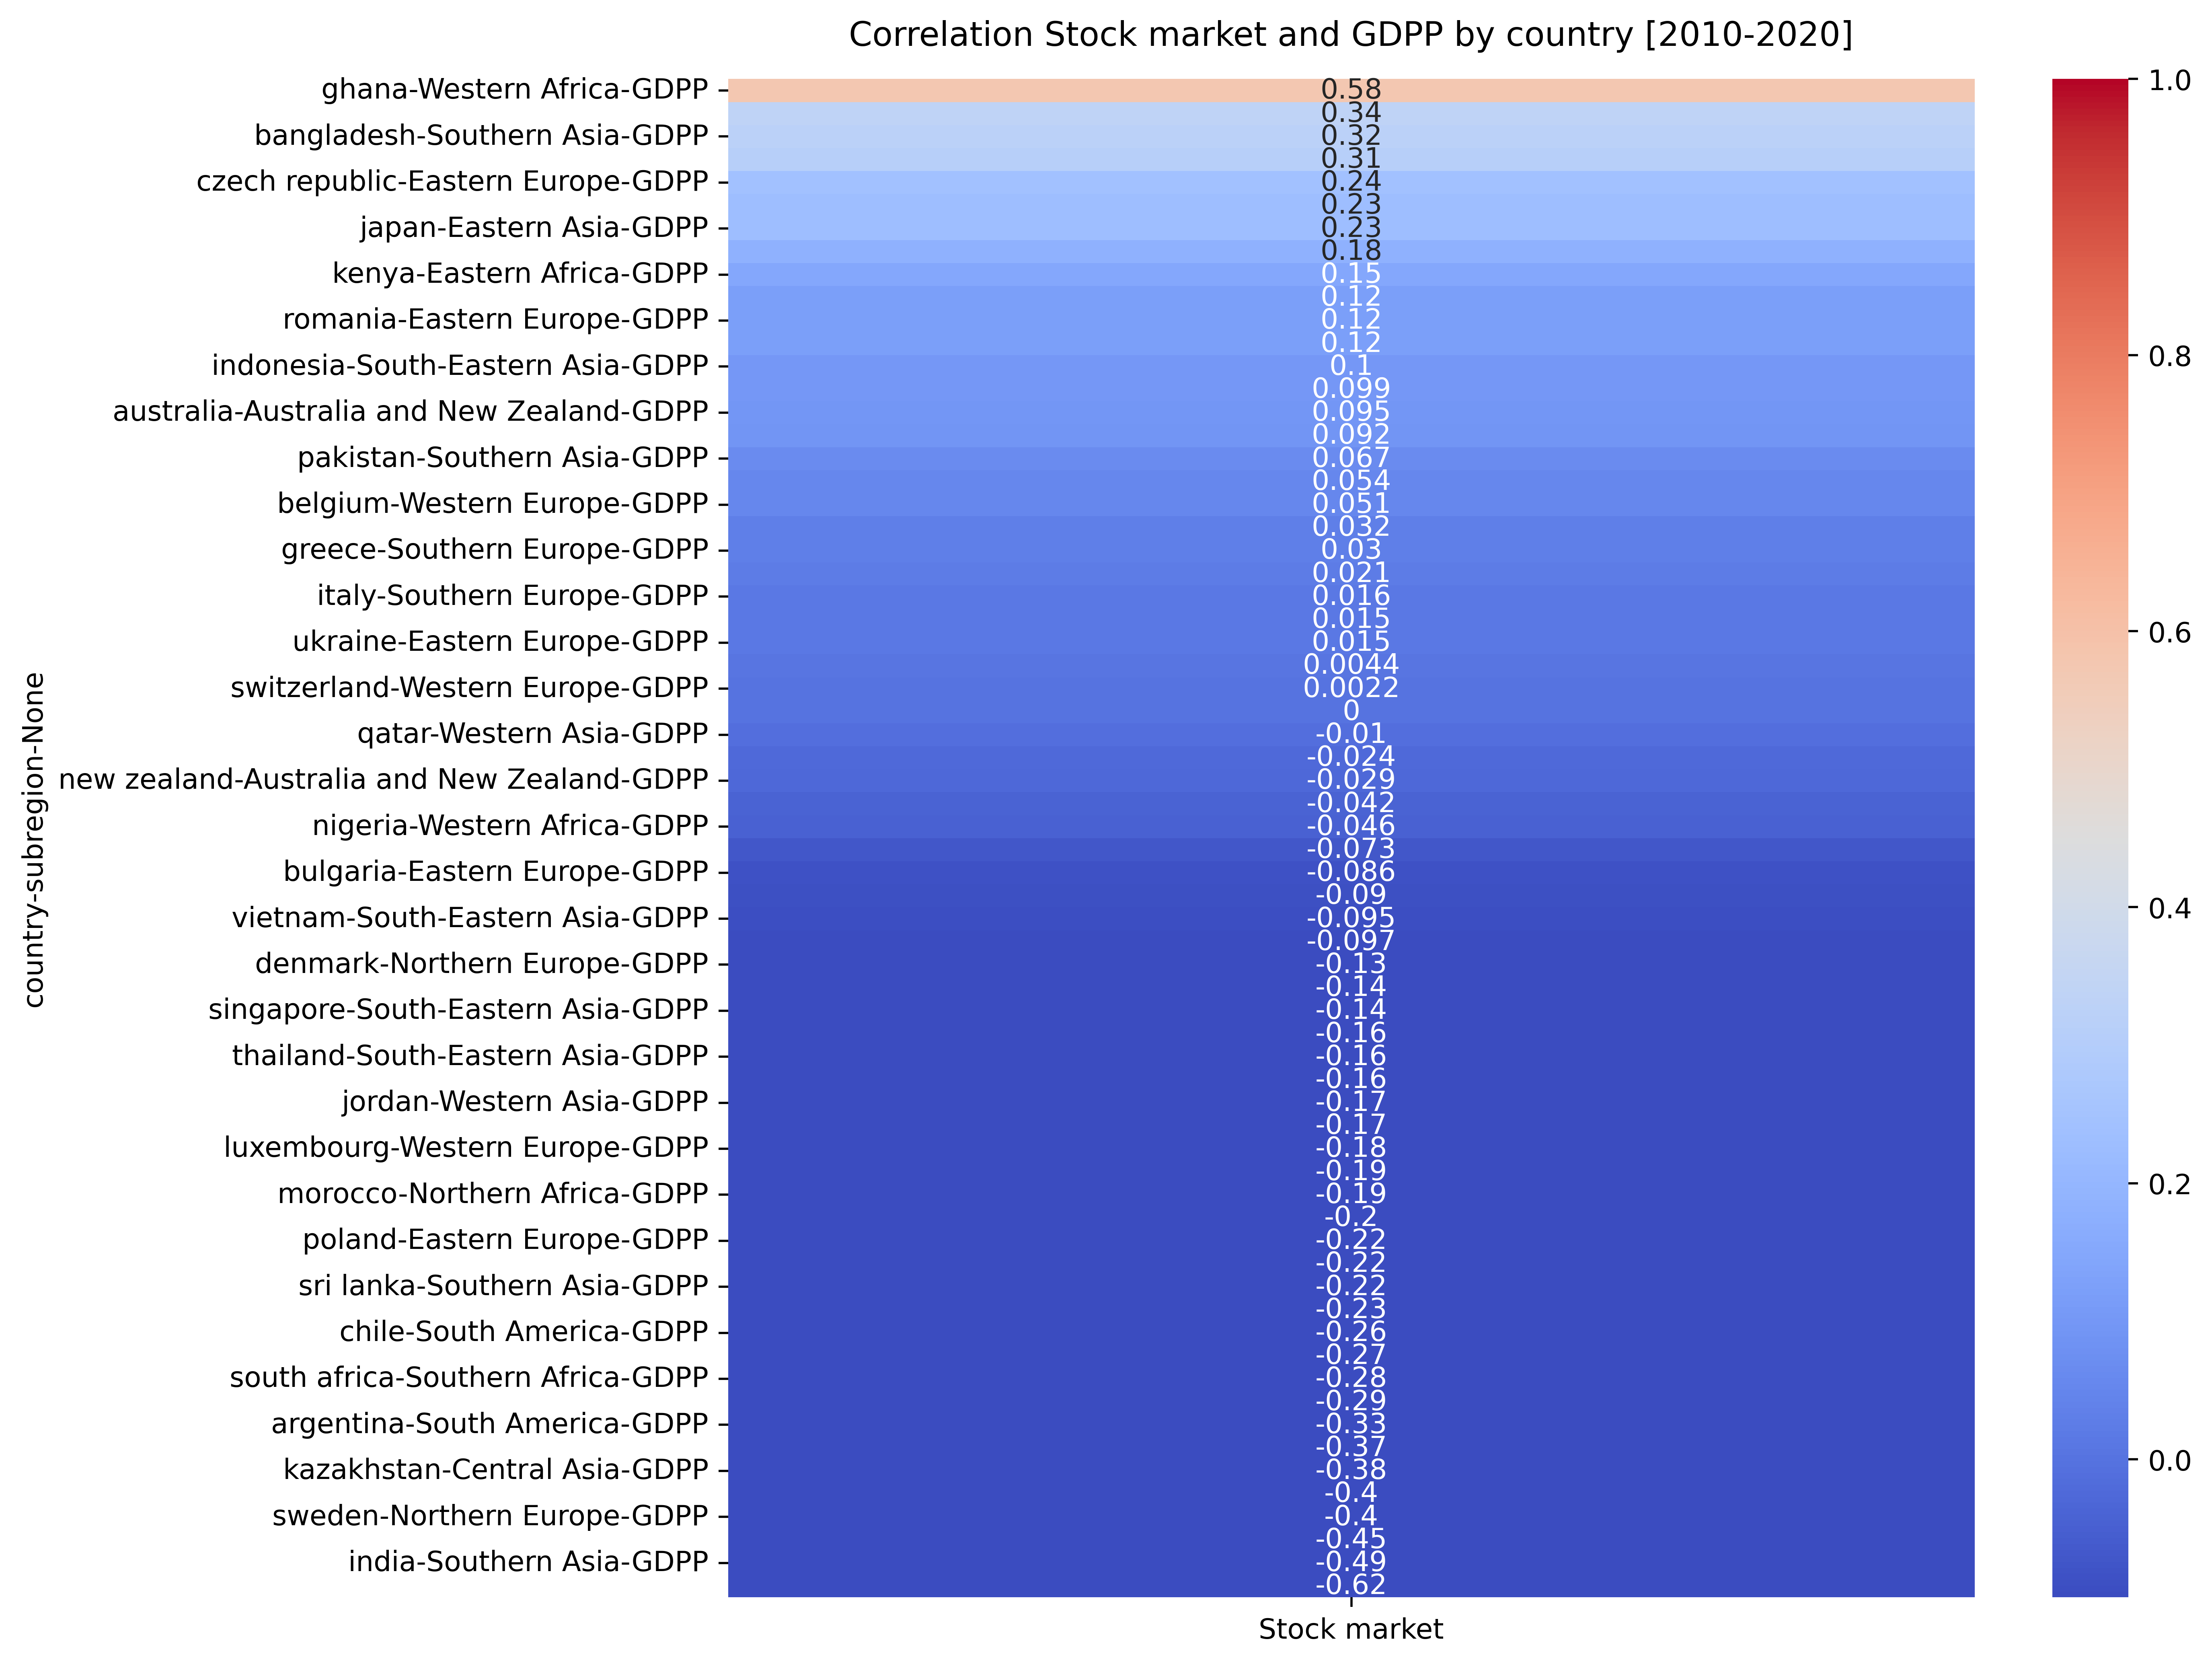

In [82]:
groupby_country= groupby_country.loc[ : , ['Stock market'] ] 
groupby_country = groupby_country.loc[ groupby_country['Stock market']!=1] 
groupby_country=groupby_country.sort_values(by='Stock market',ascending=False)
plt.figure(figsize=(10, 10),dpi=500)
sns.heatmap(groupby_country,annot = True, cmap = 'coolwarm',vmin=1, vmax=0)
plt.title('Correlation Stock market and GDPP by country [2010-2020]', fontdict={'fontsize':12}, pad=12);

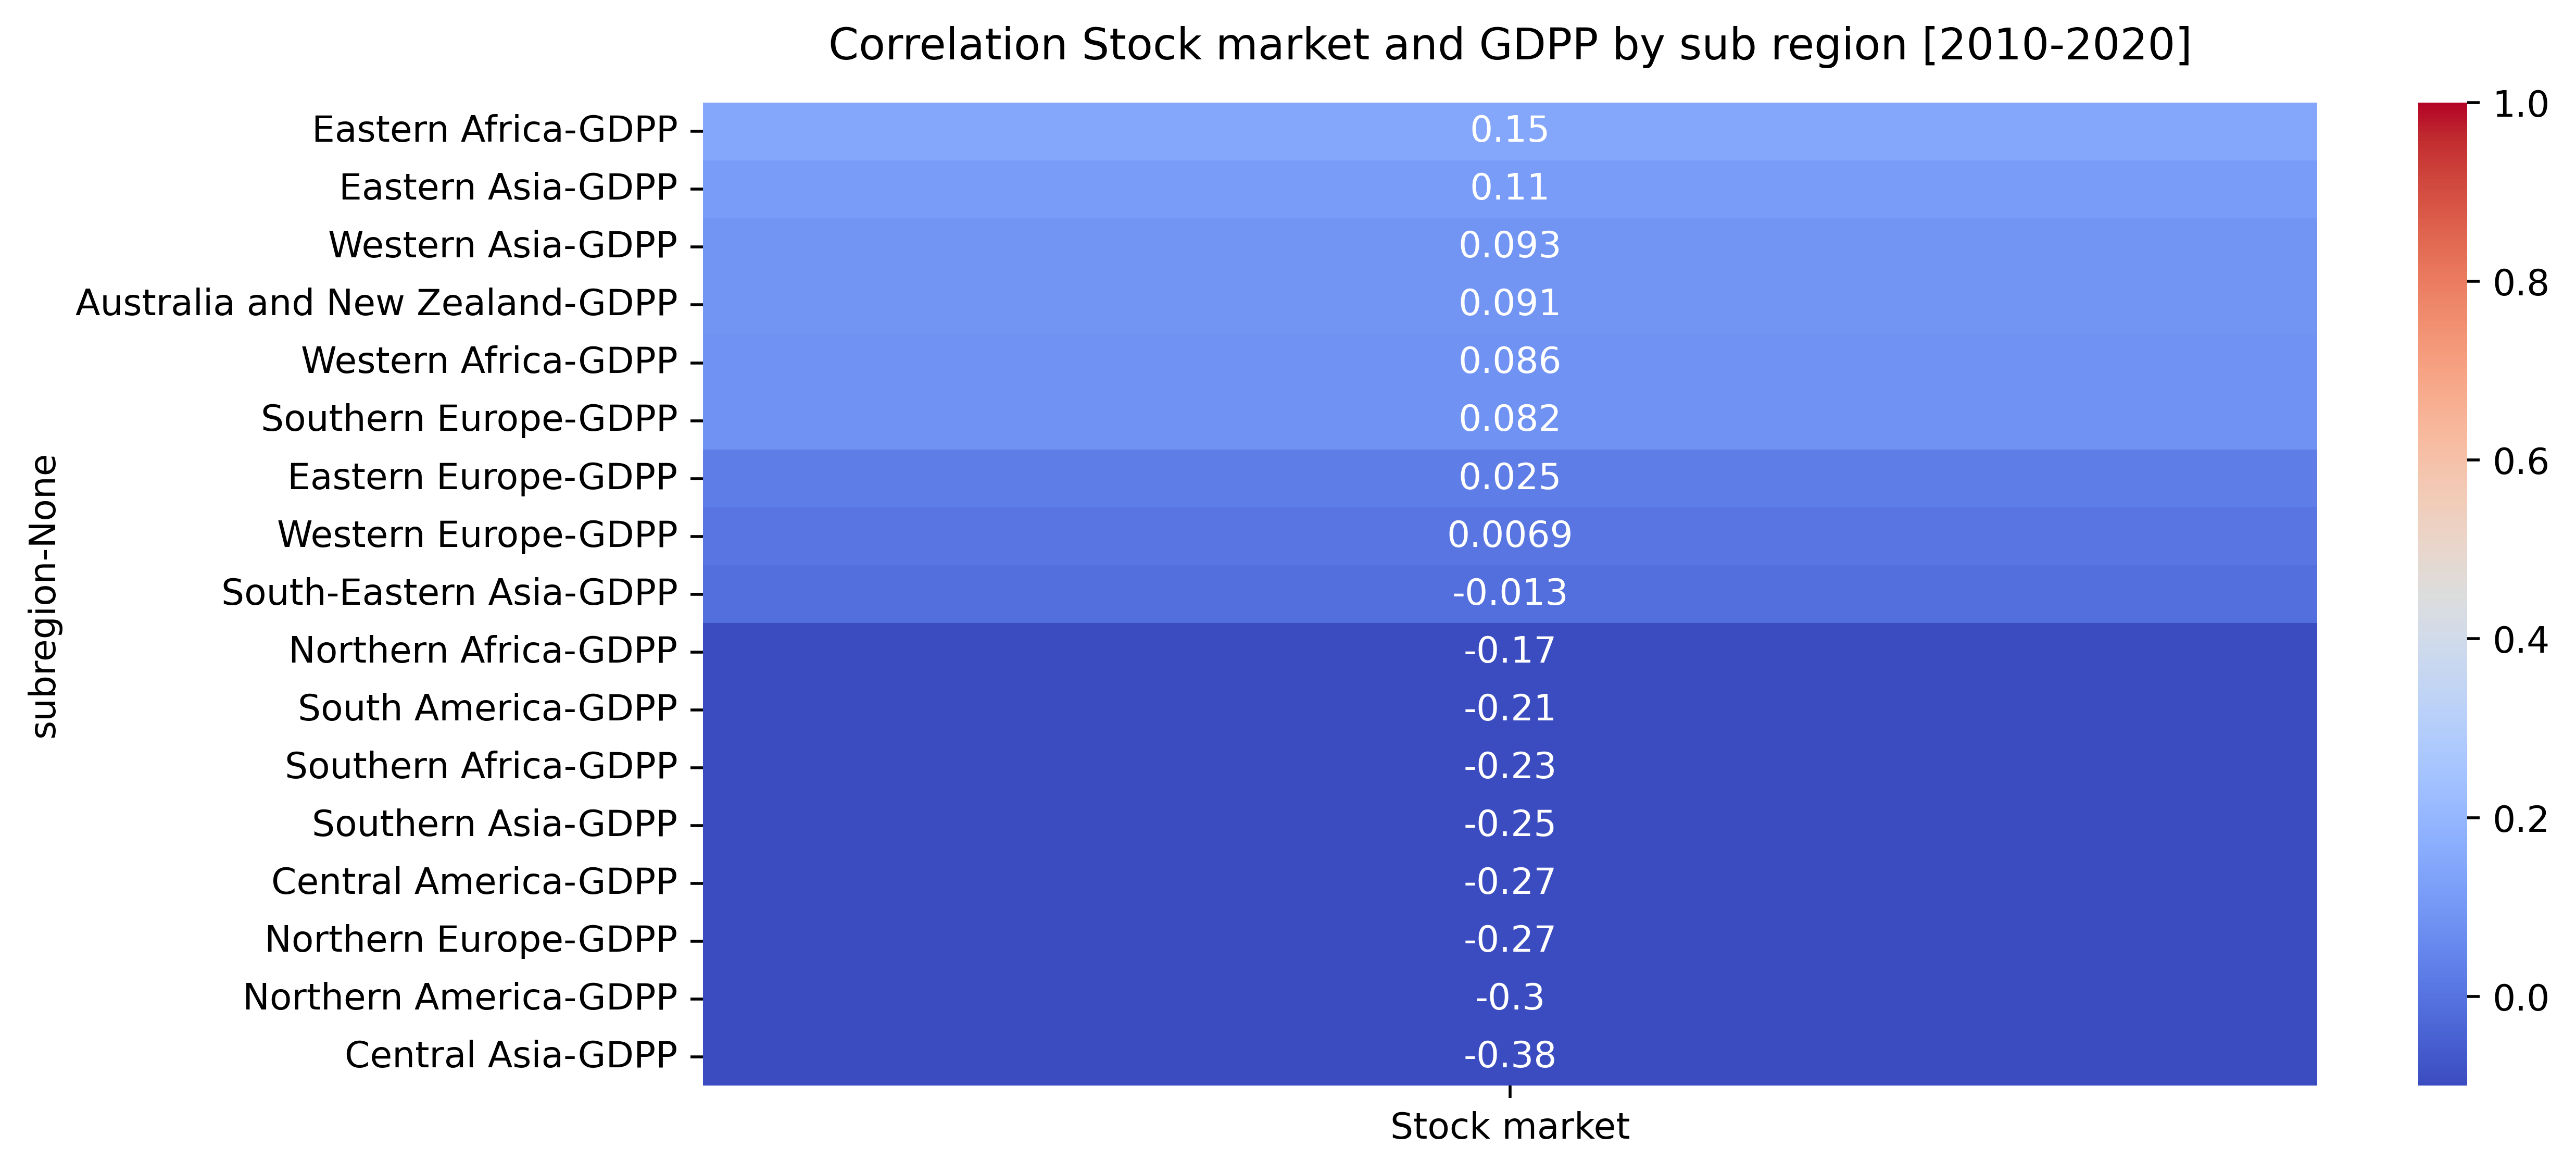

In [81]:
groupby_sregion= groupby_sregion.loc[ : , ['Stock market'] ] 
groupby_sregion = groupby_sregion.loc[ groupby_sregion['Stock market']!=1] 
groupby_sregion=groupby_sregion.sort_values(by='Stock market',ascending=False)
plt.figure(figsize=(10,5),dpi=500)
sns.heatmap(groupby_sregion,annot = True, cmap = 'coolwarm',vmin=1, vmax=0)
plt.title('Correlation Stock market and GDPP by sub region [2010-2020]', fontdict={'fontsize':12}, pad=12);

# ความสัมพันธ์ของตลาดหุ้นสหรัฐ และประเทศอื่นๆ

In [20]:
#usa
us = df_stock.loc[ df_stock['country']=='united states']
inners_us=df_stock.merge(us, left_on='year', right_on='year')
inners_us = inners_us.merge(df_name,left_on='country_x',right_on='country')
inners_us.columns =['country' , 'year' , 'Stock market' ,'u.s.', 'Stock market of u.s.','country_1','region','subregion' ]
data_types_dict = {'year': str}
inners_us = inners_us.astype(data_types_dict)
groupbys_us_country = inners_us.groupby(['country','subregion'])
groupbys_us_sregion = inners_us.groupby(['subregion'])

In [21]:
groupbys_us_country = groupbys_us_country.corr(method='spearman')
groupbys_us_country

Stock market  \
country        subregion                                                      
argentina      South America             Stock market              1.000000   
                                         Stock market of u.s.      0.742474   
australia      Australia and New Zealand Stock market              1.000000   
                                         Stock market of u.s.      0.757379   
austria        Western Europe            Stock market              1.000000   
...                                                                     ...   
united kingdom Northern Europe           Stock market of u.s.      0.749042   
united states  Northern America          Stock market              1.000000   
                                         Stock market of u.s.      0.944171   
vietnam        South-Eastern Asia        Stock market              1.000000   
                                         Stock market of u.s.      0.661193   

                                                               Stock market of u.s.  
country        subregion                                                             
argentina      South America             Stock market                      0.742474  
                                         Stock market of u.s.              1.000000  
australia      Australia and New Zealand Stock market                      0.757379  
                                         Stock market of u.s.              1.000000  
austria        Western Europe            Stock market                      0.636289  
...                                                                             ...  
united kingdom Northern Europe           Stock market of u.s.              1.000000  
united states  Northern America          Stock market                      0.944171  
                                         Stock market of u.s.              1.000000  
vietnam        South-Eastern Asia        Stock market                      0.661193  
                                         Stock market of u.s.              1.000000  

[136 rows x 2 columns]

In [22]:
groupbys_us_sregion = groupbys_us_sregion.corr(method='spearman')
groupbys_us_sregion

Stock market  \
subregion                                                      
Australia and New Zealand Stock market              1.000000   
                          Stock market of u.s.      0.737195   
Central America           Stock market              1.000000   
                          Stock market of u.s.      0.543625   
Central Asia              Stock market              1.000000   
                          Stock market of u.s.      0.428846   
Eastern Africa            Stock market              1.000000   
                          Stock market of u.s.      0.557925   
Eastern Asia              Stock market              1.000000   
                          Stock market of u.s.      0.588180   
Eastern Europe            Stock market              1.000000   
                          Stock market of u.s.      0.426708   
Northern Africa           Stock market              1.000000   
                          Stock market of u.s.      0.295630   
Northern America          Stock market              1.000000   
                          Stock market of u.s.      0.636312   
Northern Europe           Stock market              1.000000   
                          Stock market of u.s.      0.704891   
South America             Stock market              1.000000   
                          Stock market of u.s.      0.396663   
South-Eastern Asia        Stock market              1.000000   
                          Stock market of u.s.      0.501991   
Southern Africa           Stock market              1.000000   
                          Stock market of u.s.      0.548178   
Southern Asia             Stock market              1.000000   
                          Stock market of u.s.      0.519976   
Southern Europe           Stock market              1.000000   
                          Stock market of u.s.      0.628078   
Western Africa            Stock market              1.000000   
                          Stock market of u.s.      0.418650   
Western Asia              Stock market              1.000000   
                          Stock market of u.s.      0.381736   
Western Europe            Stock market              1.000000   
                          Stock market of u.s.      0.709850   

                                                Stock market of u.s.  
subregion                                                             
Australia and New Zealand Stock market                      0.737195  
                          Stock market of u.s.              1.000000  
Central America           Stock market                      0.543625  
                          Stock market of u.s.              1.000000  
Central Asia              Stock market                      0.428846  
                          Stock market of u.s.              1.000000  
Eastern Africa            Stock market                      0.557925  
                          Stock market of u.s.              1.000000  
Eastern Asia              Stock market                      0.588180  
                          Stock market of u.s.              1.000000  
Eastern Europe            Stock market                      0.426708  
                          Stock market of u.s.              1.000000  
Northern Africa           Stock market                      0.295630  
                          Stock market of u.s.              1.000000  
Northern America          Stock market                      0.636312  
                          Stock market of u.s.              1.000000  
Northern Europe           Stock market                      0.704891  
                          Stock market of u.s.              1.000000  
South America             Stock market                      0.396663  
                          Stock market of u.s.              1.000000  
South-Eastern Asia        Stock market                      0.501991  
                          Stock market of u.s.              1.000000  
Southern Africa           Stock market 

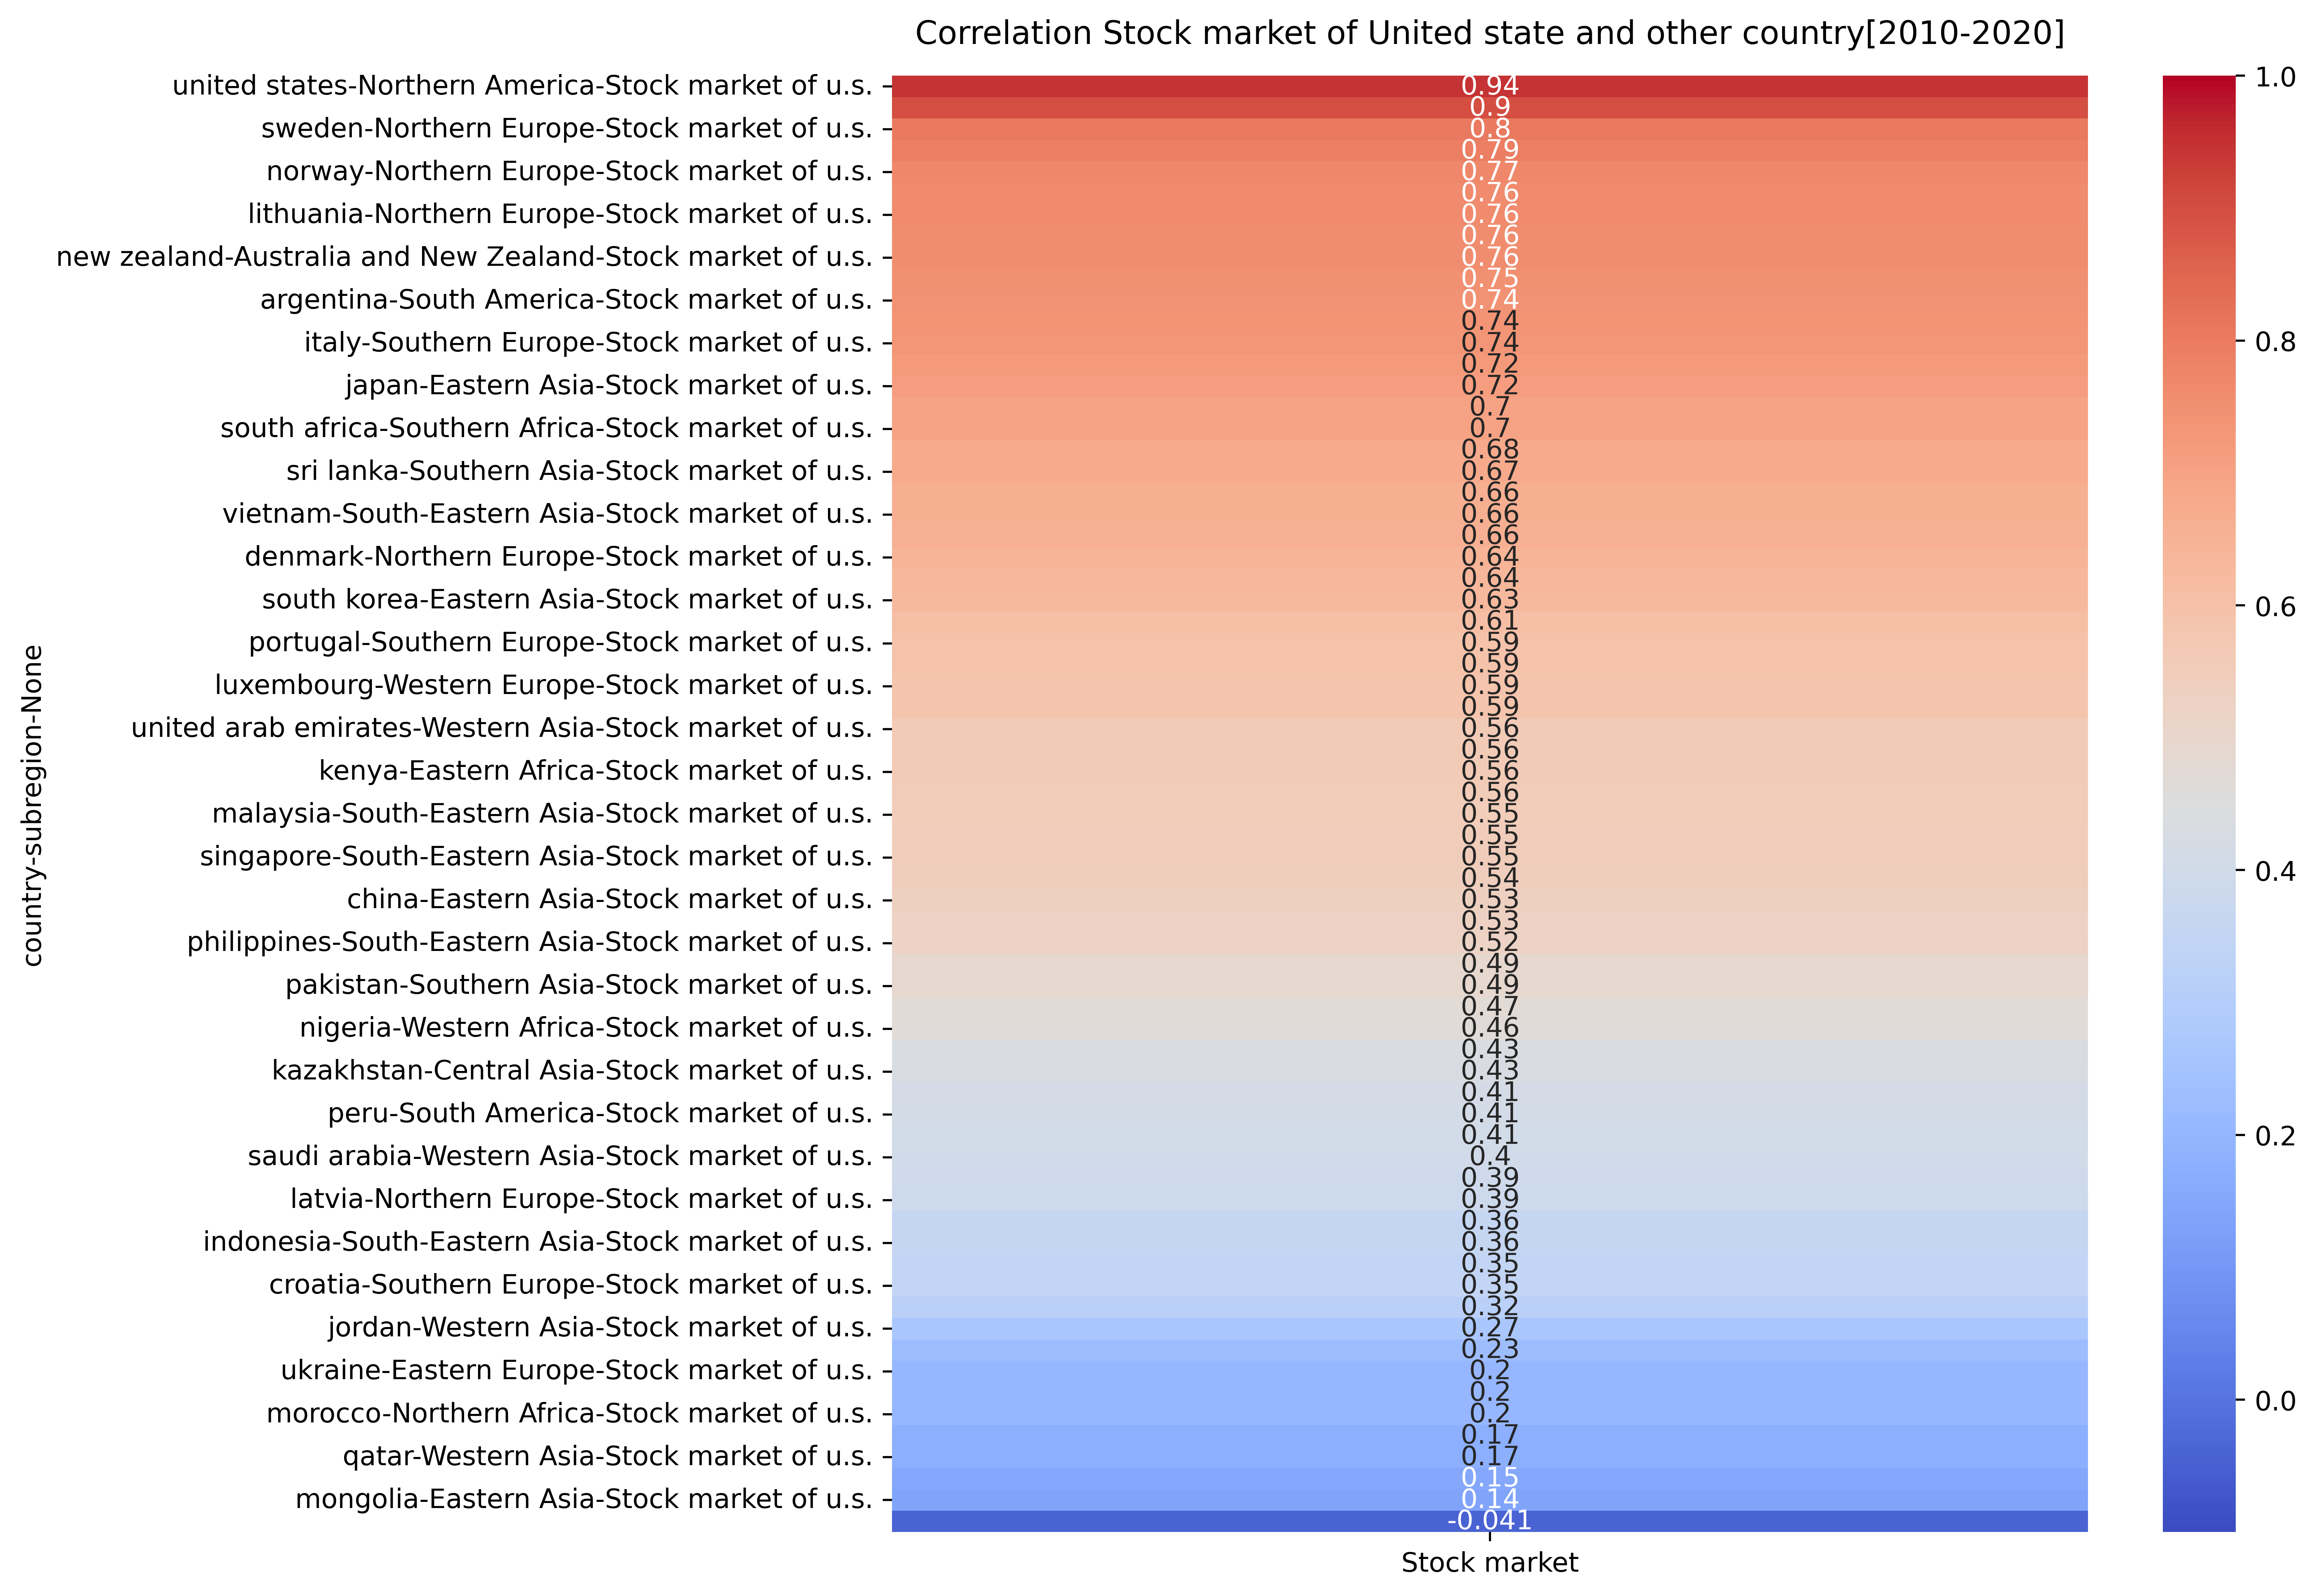

In [83]:
groupbys_us_country= groupbys_us_country.loc[ : , ['Stock market'] ] 
groupbys_us_country = groupbys_us_country.loc[ groupbys_us_country['Stock market']!=1] 
groupbys_us_country=groupbys_us_country.sort_values(by='Stock market',ascending=False)
plt.figure(figsize=(10,10),dpi=500)
sns.heatmap(groupbys_us_country,annot = True, cmap = 'coolwarm',vmin=1, vmax=0)
plt.title('Correlation Stock market of United state and other country[2010-2020]', fontdict={'fontsize':12}, pad=12);

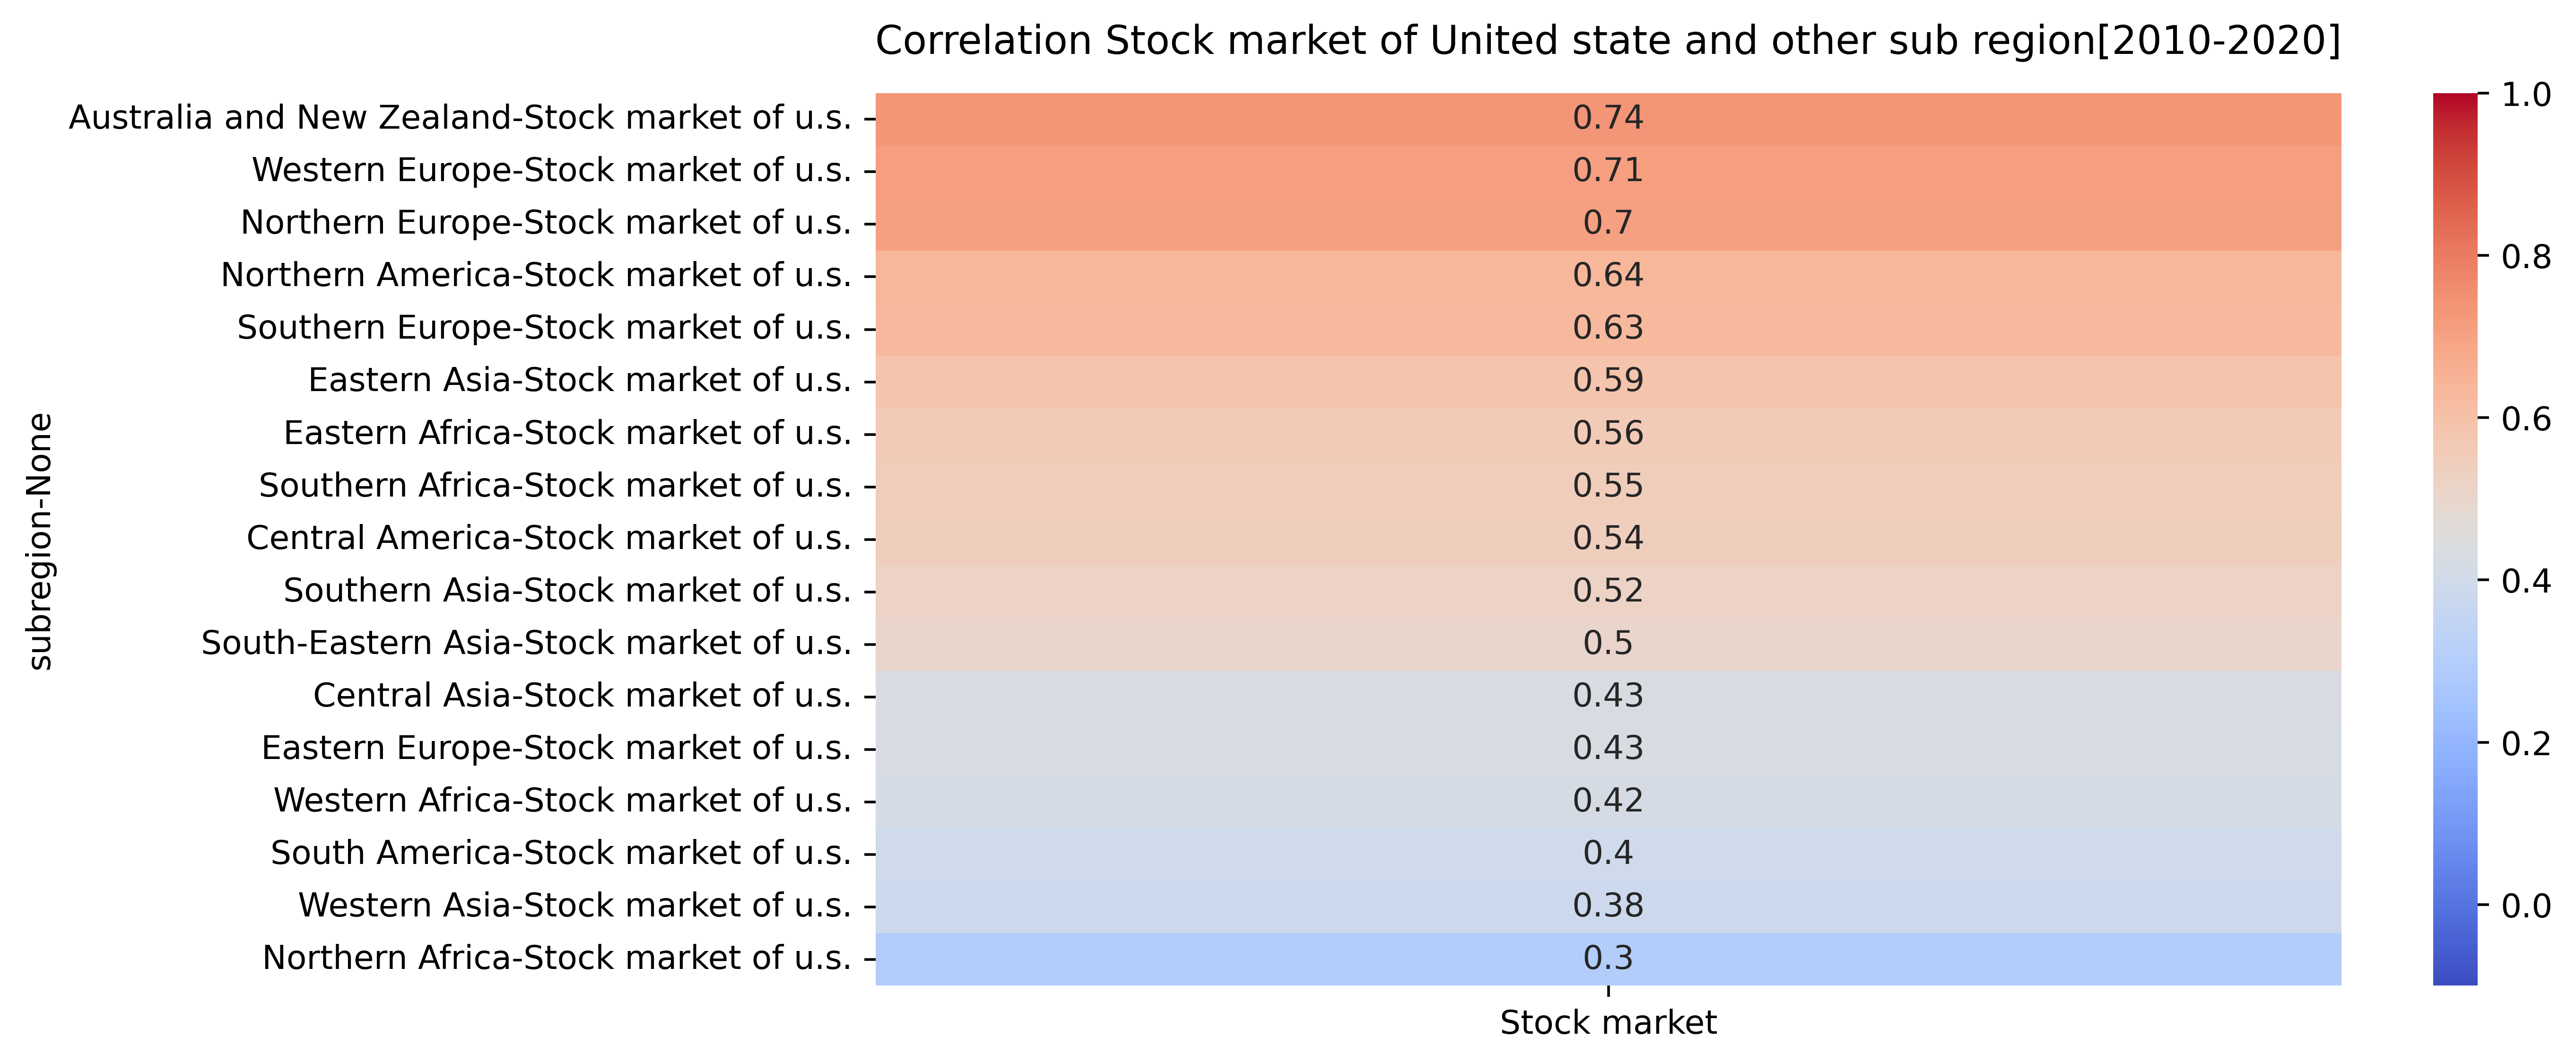

In [84]:
groupbys_us_sregion= groupbys_us_sregion.loc[ : , ['Stock market'] ] 
groupbys_us_sregion = groupbys_us_sregion.loc[ groupbys_us_sregion['Stock market']!=1] 
groupbys_us_sregion=groupbys_us_sregion.sort_values(by='Stock market',ascending=False)
plt.figure(figsize=(10, 5),dpi=500)
sns.heatmap(groupbys_us_sregion,annot = True, cmap = 'coolwarm',vmin=1, vmax=0)
plt.title('Correlation Stock market of United state and other sub region[2010-2020]', fontdict={'fontsize':12}, pad=12);

# ความสัมพันธ์ของตลาดหุ้นจีน และประเทศอื่นๆ

In [27]:
china = df_stock.loc[ df_stock['country']=='china']
inners_china=df_stock.merge(china, left_on='year', right_on='year')
inners_china = inners_china.merge(df_name,left_on='country_x',right_on='country')
inners_china.columns =['country' , 'year' , 'Stock market' ,'china', 'Stock market of china','country_1','region','subregion' ]
data_types_dict = {'year': str}
inners_china = inners_china.astype(data_types_dict)
groupbys_china_country = inners_china.groupby(['country'])
groupbys_china_sregion = inners_china.groupby(['subregion'])

In [28]:
groupbys_china_country = groupbys_china_country.corr(method='spearman')
groupbys_china_country

Stock market  Stock market of china
country                                                                  
argentina      Stock market               1.000000               0.477967
               Stock market of china      0.477967               1.000000
australia      Stock market               1.000000               0.663182
               Stock market of china      0.663182               1.000000
austria        Stock market               1.000000               0.436870
...                                            ...                    ...
united kingdom Stock market of china      0.366348               1.000000
united states  Stock market               1.000000               0.534506
               Stock market of china      0.534506               1.000000
vietnam        Stock market               1.000000               0.719078
               Stock market of china      0.719078               1.000000

[136 rows x 2 columns]

In [29]:
groupbys_china_sregion = groupbys_china_sregion.corr(method='spearman')
groupbys_china_sregion

Stock market  \
subregion                                                       
Australia and New Zealand Stock market               1.000000   
                          Stock market of china      0.595623   
Central America           Stock market               1.000000   
                          Stock market of china      0.547957   
Central Asia              Stock market               1.000000   
                          Stock market of china      0.484124   
Eastern Africa            Stock market               1.000000   
                          Stock market of china      0.286334   
Eastern Asia              Stock market               1.000000   
                          Stock market of china      0.575631   
Eastern Europe            Stock market               1.000000   
                          Stock market of china      0.488101   
Northern Africa           Stock market               1.000000   
                          Stock market of china      0.365079   
Northern America          Stock market               1.000000   
                          Stock market of china      0.444899   
Northern Europe           Stock market               1.000000   
                          Stock market of china      0.448168   
South America             Stock market               1.000000   
                          Stock market of china      0.393680   
South-Eastern Asia        Stock market               1.000000   
                          Stock market of china      0.561908   
Southern Africa           Stock market               1.000000   
                          Stock market of china      0.524467   
Southern Asia             Stock market               1.000000   
                          Stock market of china      0.595829   
Southern Europe           Stock market               1.000000   
                          Stock market of china      0.566332   
Western Africa            Stock market               1.000000   
                          Stock market of china      0.148424   
Western Asia              Stock market               1.000000   
                          Stock market of china      0.454360   
Western Europe            Stock market               1.000000   
                          Stock market of china      0.493130   

                                                 Stock market of china  
subregion                                                               
Australia and New Zealand Stock market                        0.595623  
                          Stock market of china               1.000000  
Central America           Stock market                        0.547957  
                          Stock market of china               1.000000  
Central Asia              Stock market                        0.484124  
                          Stock market of china               1.000000  
Eastern Africa            Stock market                        0.286334  
                          Stock market of china               1.000000  
Eastern Asia              Stock market                        0.575631  
                          Stock market of china               1.000000  
Eastern Europe            Stock market                        0.488101  
                          Stock market of china               1.000000  
Northern Africa           Stock market                        0.365079  
                          Stock market of china               1.000000  
Northern America          Stock market                        0.444899  
                          Stock market of china               1.000000  
Northern Europe           Stock market                        0.448168  
                          Stock market of china               1.000000  
South America             Stock market                        0.393680  
                          Stock market of china               1.000000  
South-Eastern Asia        Stock market                        0.561908  
                          Sto

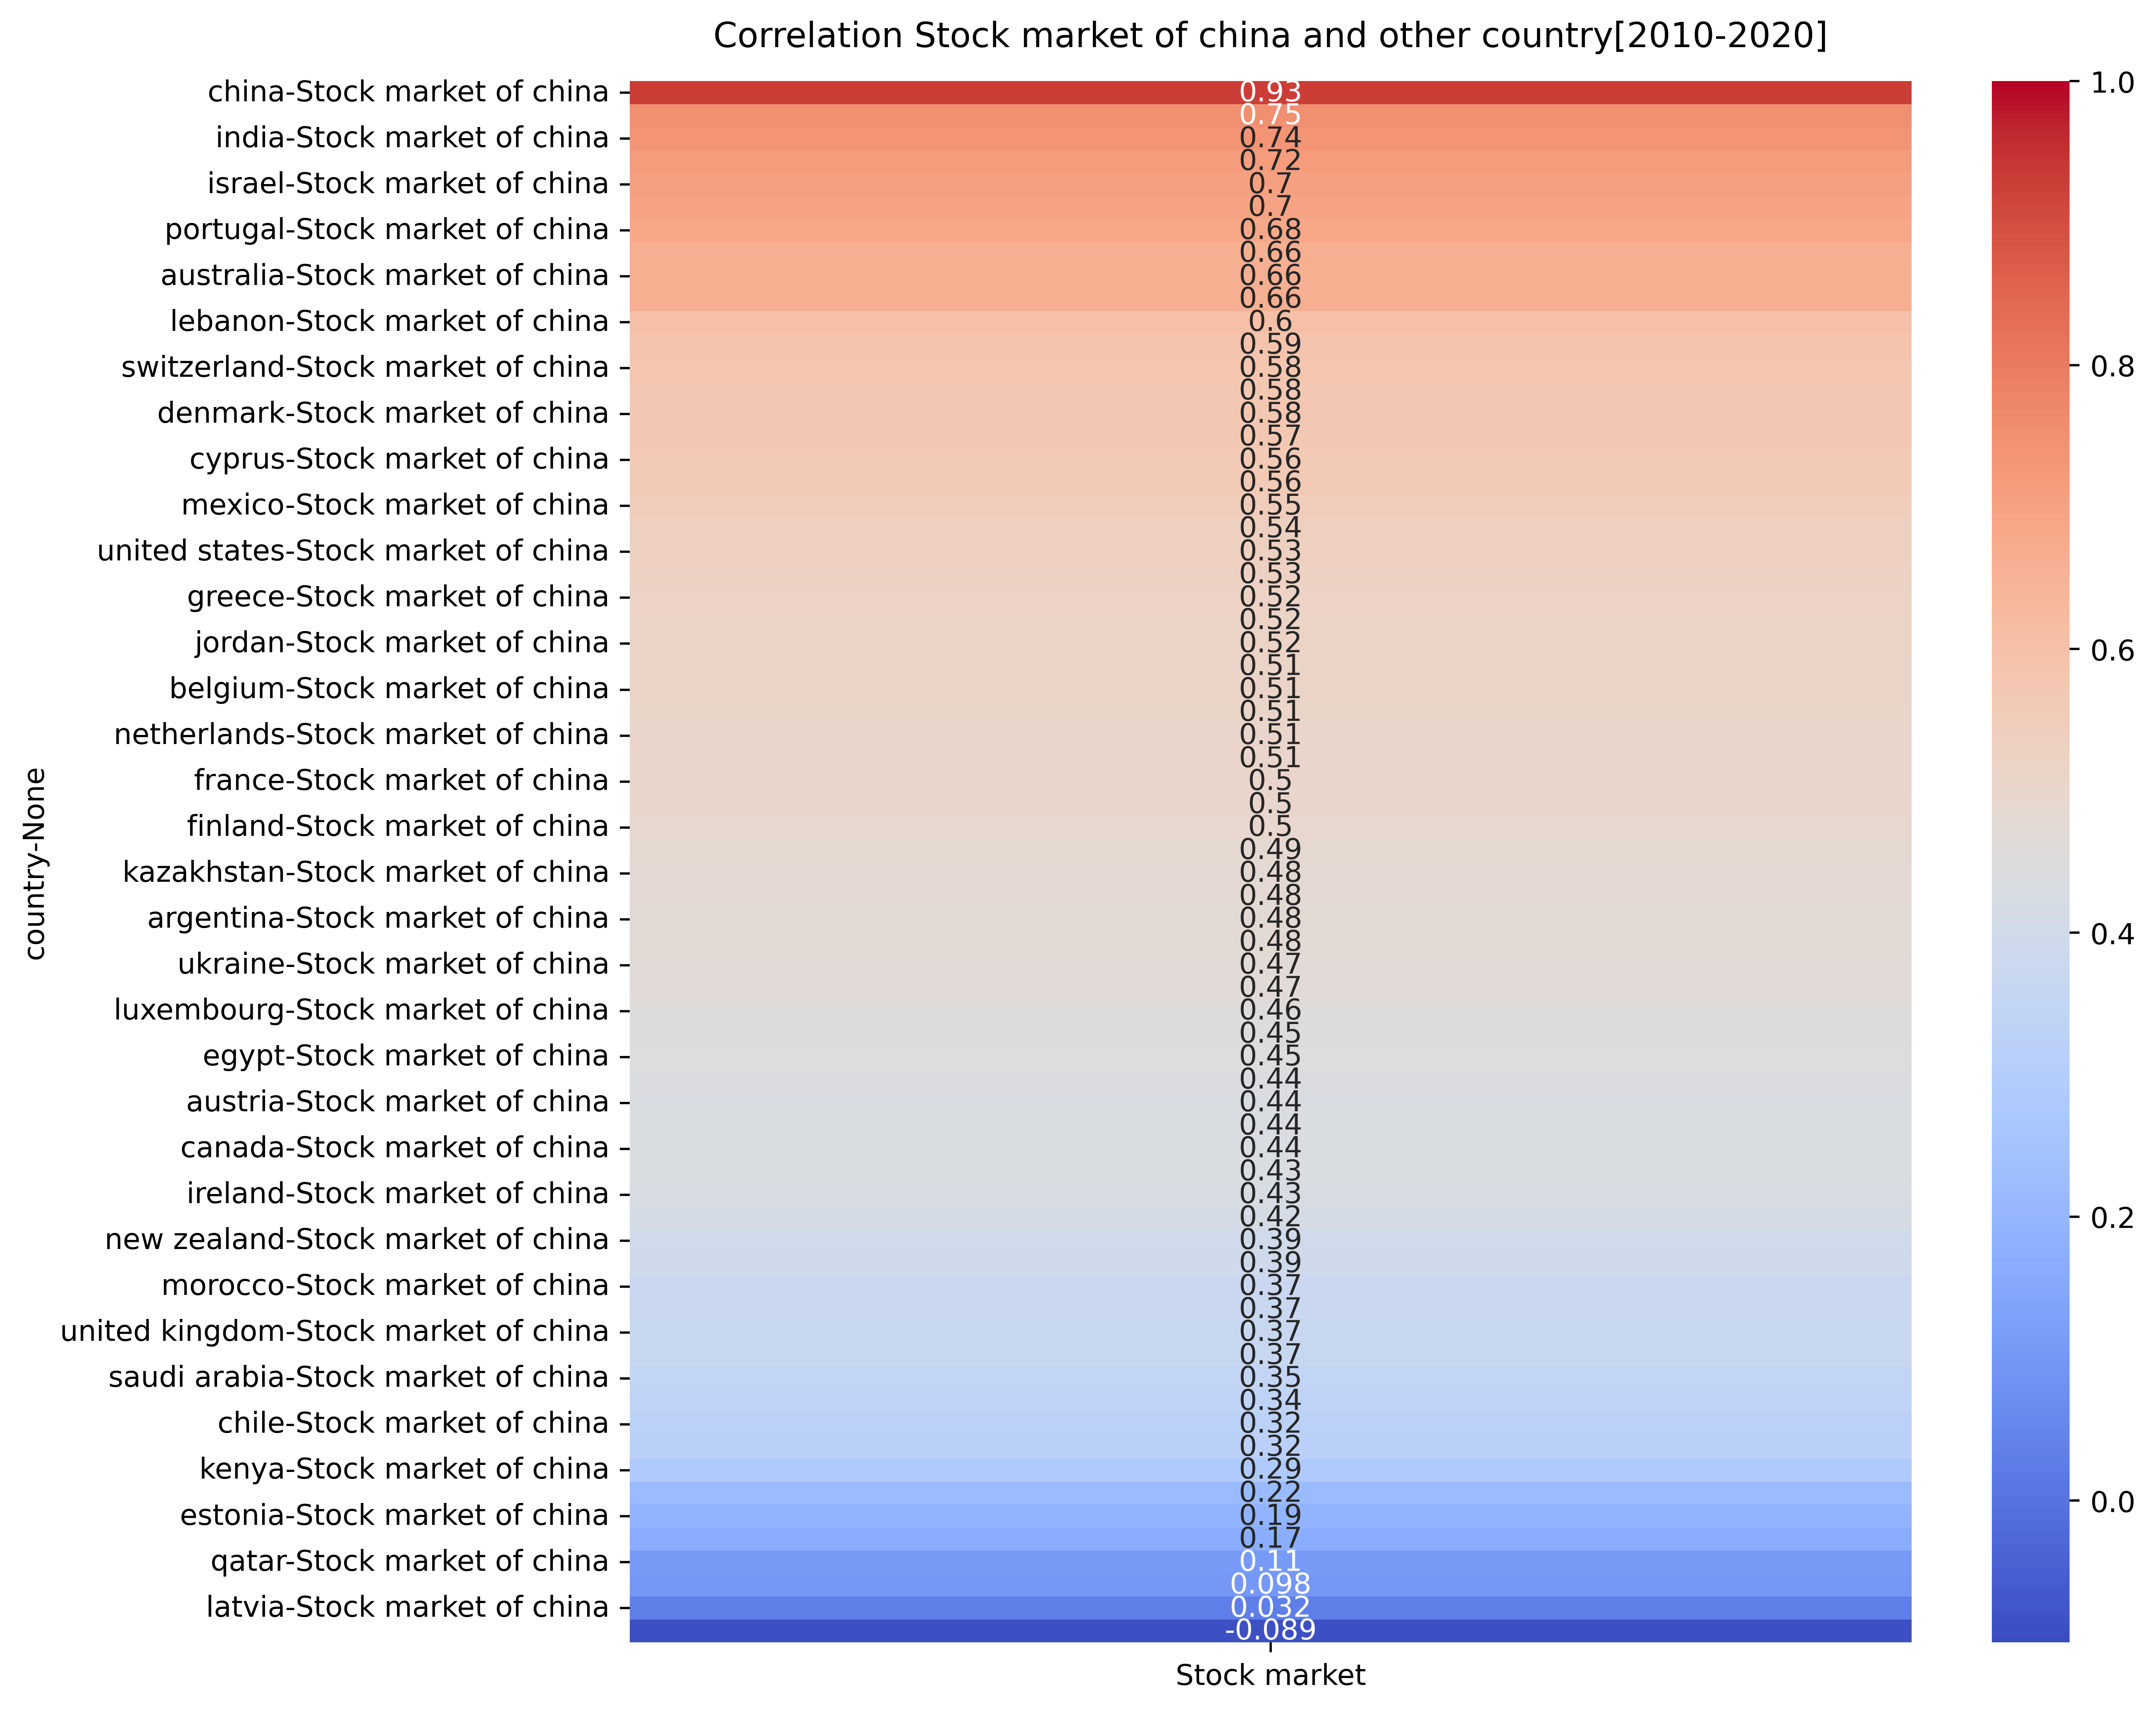

In [85]:
groupbys_china_country= groupbys_china_country.loc[ : , ['Stock market'] ] 
groupbys_china_country = groupbys_china_country.loc[ groupbys_china_country['Stock market']!=1]
groupbys_china_country=groupbys_china_country.sort_values(by='Stock market',ascending=False)
plt.figure(figsize=(10, 10),dpi=500)
sns.heatmap(groupbys_china_country,annot = True, cmap = 'coolwarm',vmin=1, vmax=0)
plt.title('Correlation Stock market of china and other country[2010-2020]', fontdict={'fontsize':12}, pad=12);

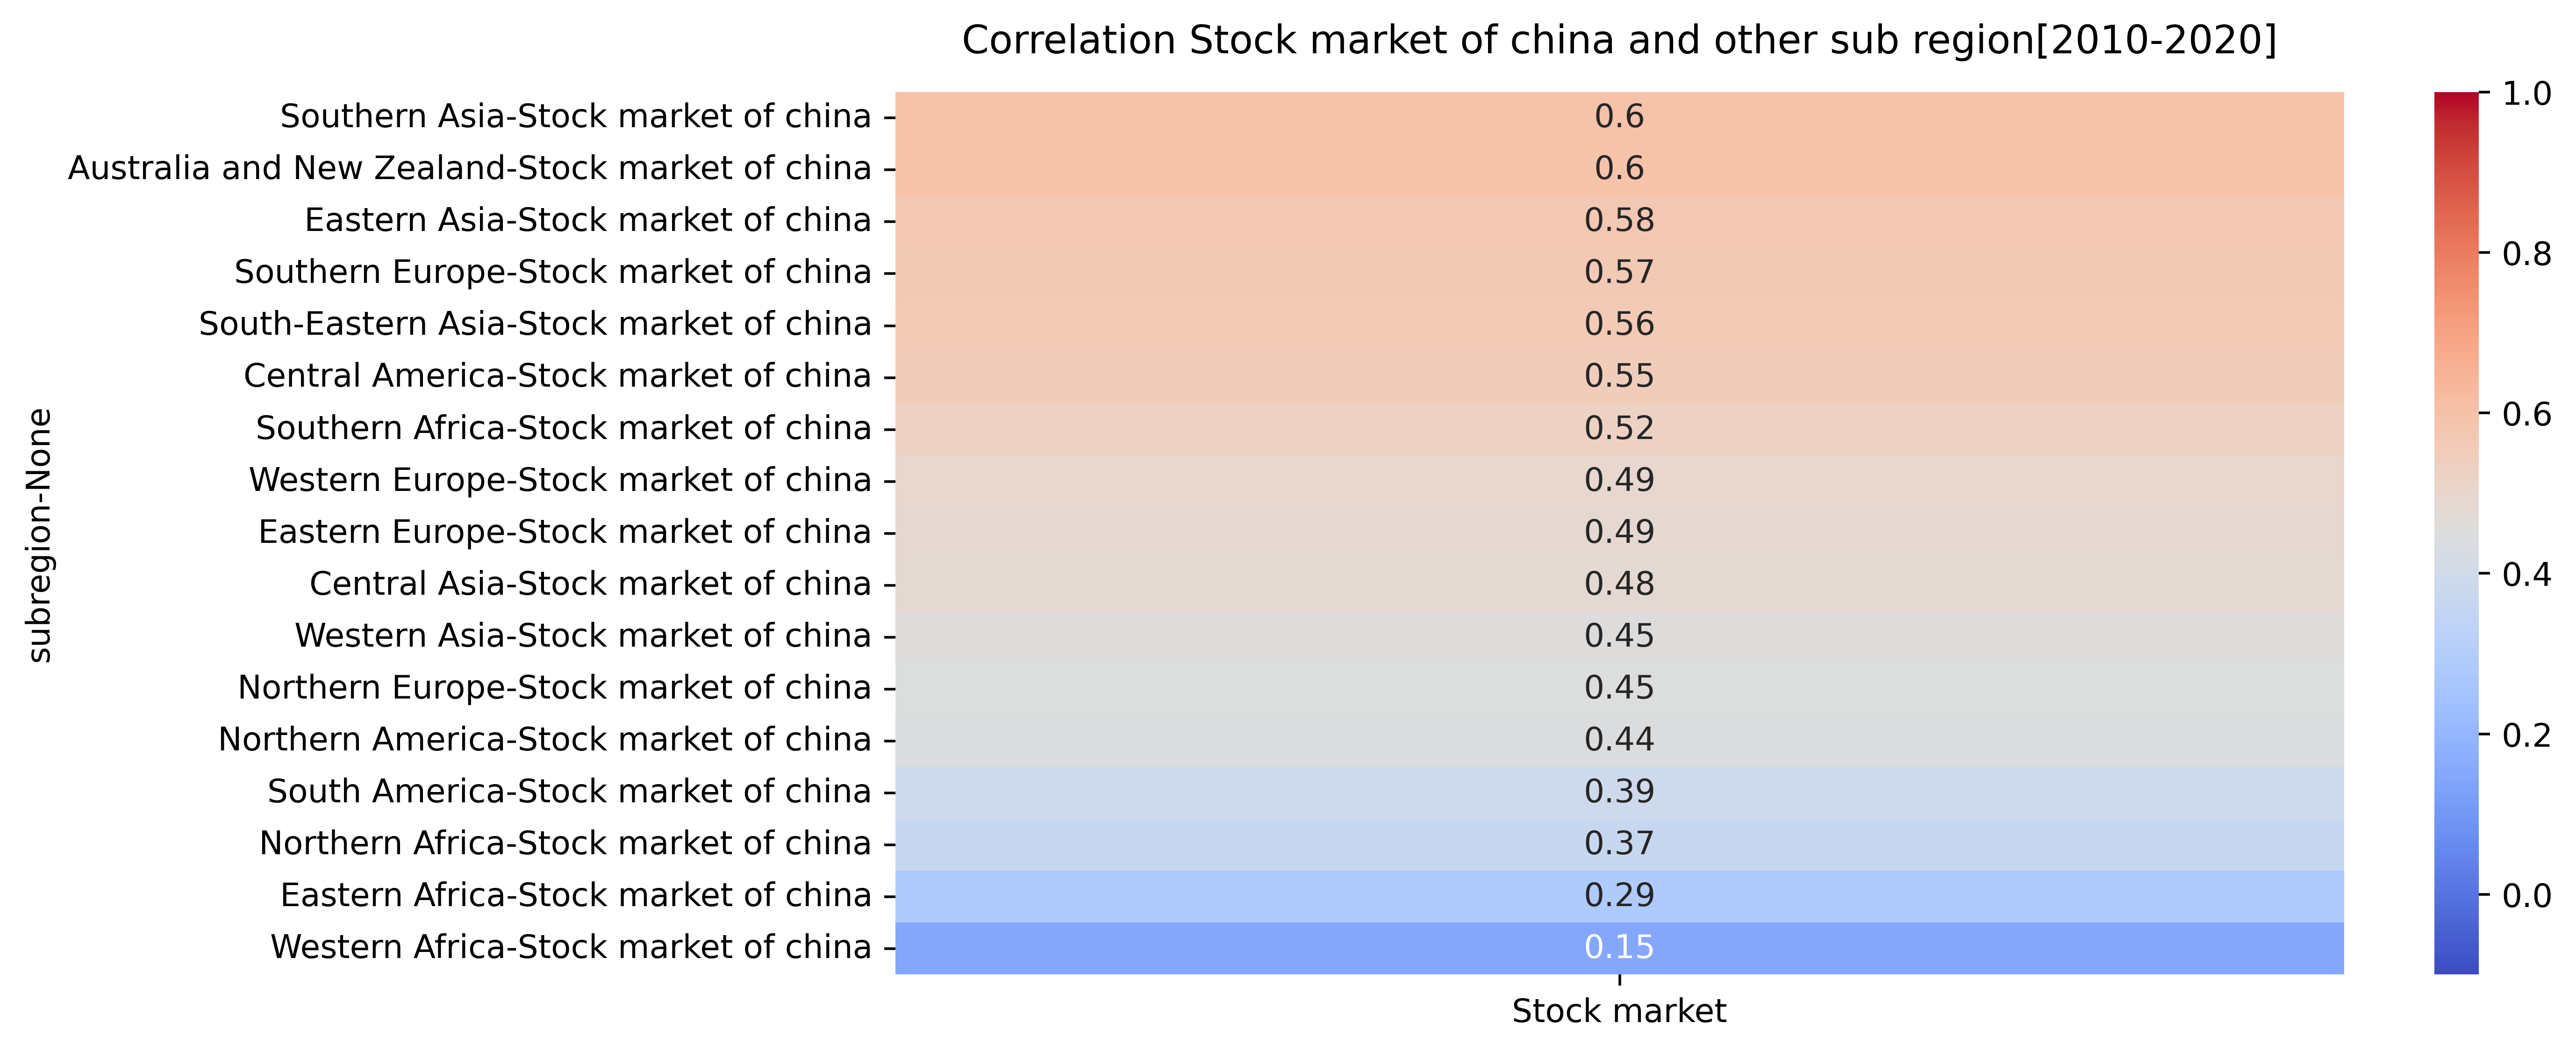

In [86]:
groupbys_china_sregion= groupbys_china_sregion.loc[ : , ['Stock market'] ] 
groupbys_china_sregion = groupbys_china_sregion.loc[ groupbys_china_sregion['Stock market']!=1] 
groupbys_china_sregion=groupbys_china_sregion.sort_values(by='Stock market',ascending=False)
plt.figure(figsize=(10, 5),dpi=500)
sns.heatmap(groupbys_china_sregion,annot = True, cmap = 'coolwarm',vmin=1, vmax=0)
plt.title('Correlation Stock market of china and other sub region[2010-2020]', fontdict={'fontsize':12}, pad=12);

# ความสัมพันธ์ของ GDP per capita ของสหรัฐ และประเทศอื่นๆ

In [32]:
#usa
us = df_gdp.loc[ df_gdp['country']=='united states']
inner_us=df_gdp.merge(us, left_on='year', right_on='year')
inner_us = inner_us.merge(df_name,left_on='country_x',right_on='country')
inner_us.columns =['country' , 'year' , 'GDPP' ,'u.s.', 'GDPP of u.s.','country_1','region','subregion' ]
data_types_dict = {'year': str}
inner_us = inner_us.astype(data_types_dict)
groupby_us_country = inner_us.groupby(['country','subregion'])
groupby_us_sregion = inner_us.groupby(['subregion'])

In [33]:
groupby_us_country = groupby_us_country.corr(method='spearman')
groupby_us_country

GDPP  GDPP of u.s.
country     subregion                                              
afghanistan Southern Asia      GDPP          1.000000      0.075000
                               GDPP of u.s.  0.075000      1.000000
albania     Southern Europe    GDPP          1.000000      0.385714
                               GDPP of u.s.  0.385714      1.000000
algeria     Northern Africa    GDPP          1.000000      0.282143
...                                               ...           ...
vietnam     South-Eastern Asia GDPP of u.s.  0.275000      1.000000
zambia      Eastern Africa     GDPP          1.000000      0.357143
                               GDPP of u.s.  0.357143      1.000000
zimbabwe    Eastern Africa     GDPP          1.000000     -0.125000
                               GDPP of u.s. -0.125000      1.000000

[372 rows x 2 columns]

In [34]:
groupby_us_sregion = groupby_us_sregion.corr(method='spearman')
groupby_us_sregion

GDPP  GDPP of u.s.
subregion                                                     
Australia and New Zealand GDPP          1.000000      0.265627
                          GDPP of u.s.  0.265627      1.000000
Caribbean                 GDPP          1.000000      0.359342
                          GDPP of u.s.  0.359342      1.000000
Central America           GDPP          1.000000      0.230075
                          GDPP of u.s.  0.230075      1.000000
Central Asia              GDPP          1.000000      0.228986
                          GDPP of u.s.  0.228986      1.000000
Eastern Africa            GDPP          1.000000      0.095266
                          GDPP of u.s.  0.095266      1.000000
Eastern Asia              GDPP          1.000000      0.137426
                          GDPP of u.s.  0.137426      1.000000
Eastern Europe            GDPP          1.000000      0.394634
                          GDPP of u.s.  0.394634      1.000000
Melanesia                 GDPP          1.000000      0.315040
                          GDPP of u.s.  0.315040      1.000000
Micronesia                GDPP          1.000000      0.059198
                          GDPP of u.s.  0.059198      1.000000
Middle Africa             GDPP          1.000000      0.224272
                          GDPP of u.s.  0.224272      1.000000
Northern Africa           GDPP          1.000000      0.283964
                          GDPP of u.s.  0.283964      1.000000
Northern America          GDPP          1.000000      0.468663
                          GDPP of u.s.  0.468663      1.000000
Northern Europe           GDPP          1.000000      0.384342
                          GDPP of u.s.  0.384342      1.000000
Polynesia                 GDPP          1.000000      0.160009
                          GDPP of u.s.  0.160009      1.000000
South America             GDPP          1.000000      0.256399
                          GDPP of u.s.  0.256399      1.000000
South-Eastern Asia        GDPP          1.000000      0.249055
                          GDPP of u.s.  0.249055      1.000000
Southern Africa           GDPP          1.000000      0.371633
                          GDPP of u.s.  0.371633      1.000000
Southern Asia             GDPP          1.000000      0.191210
                          GDPP of u.s.  0.191210      1.000000
Southern Europe           GDPP          1.000000      0.375079
                          GDPP of u.s.  0.375079      1.000000
Western Africa            GDPP          1.000000      0.188762
                          GDPP of u.s.  0.188762      1.000000
Western Asia              GDPP          1.000000      0.357323
                          GDPP of u.s.  0.357323      1.000000
Western Europe            GDPP          1.000000      0.296173
                          GDPP of u.s.  0.296173      1.000000

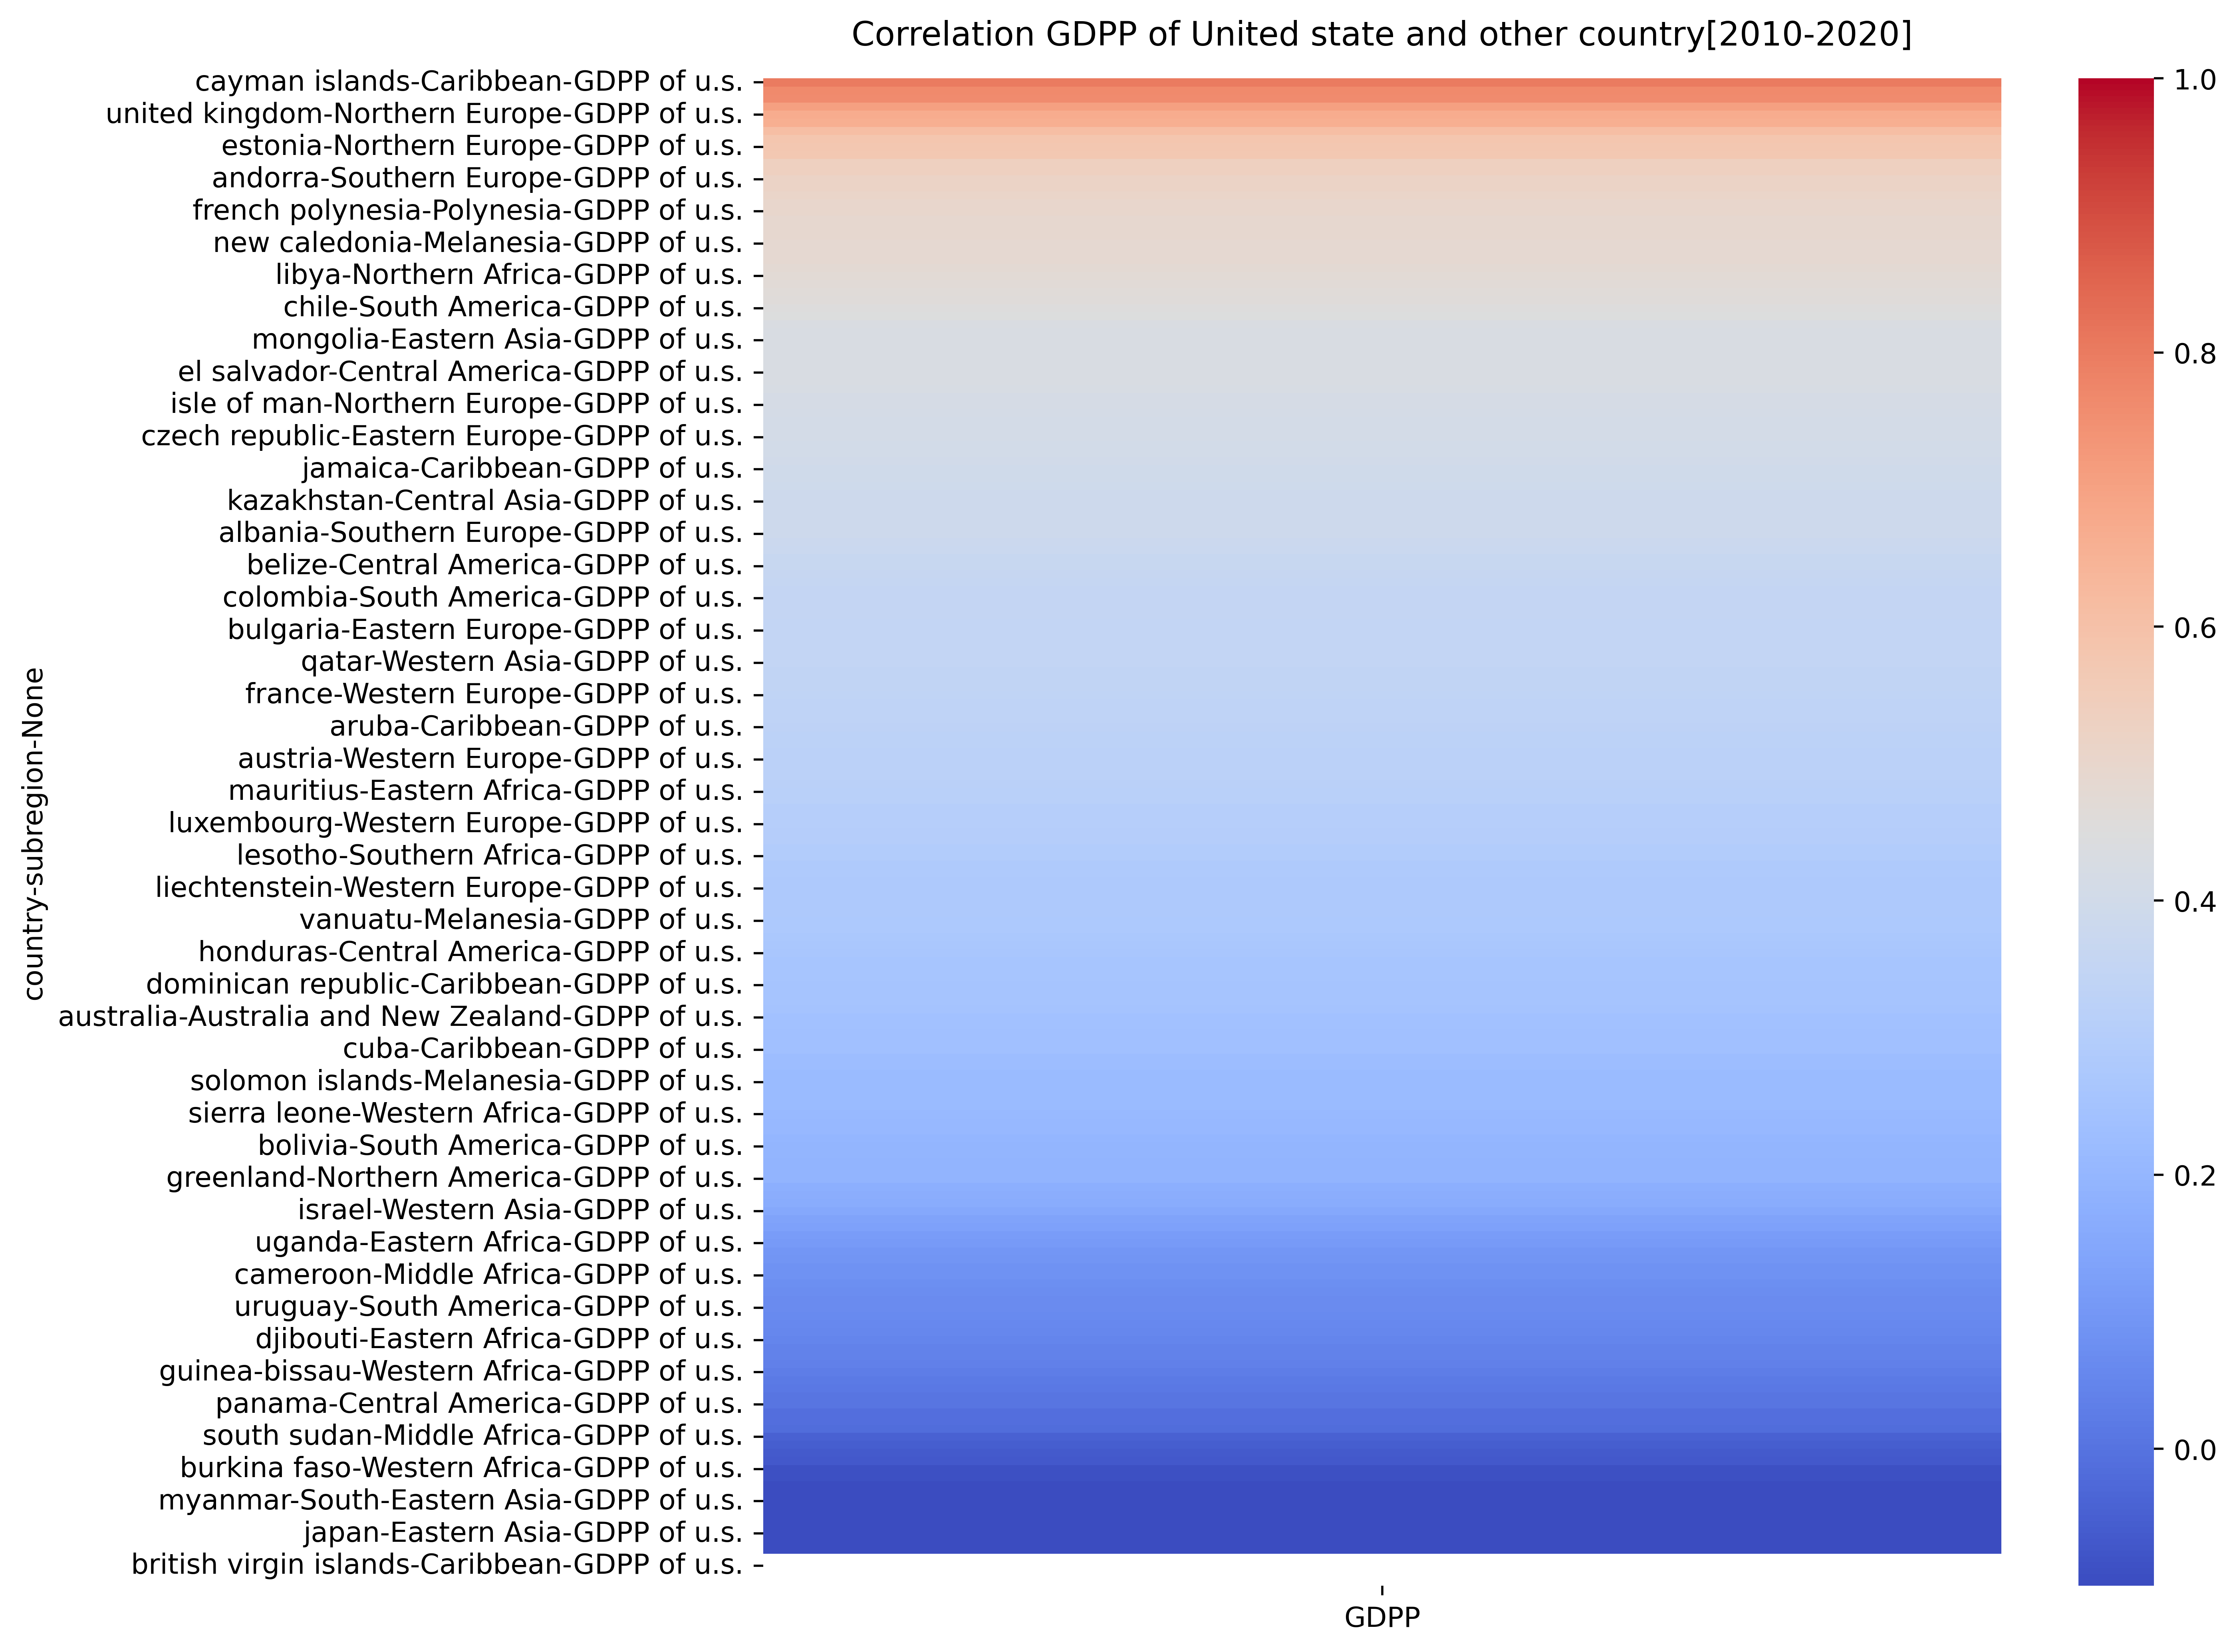

In [87]:
groupby_us_country= groupby_us_country.loc[ : , ['GDPP'] ] 
groupby_us_country = groupby_us_country.loc[ groupby_us_country['GDPP']!=1] 
groupby_us_country=groupby_us_country.sort_values(by='GDPP',ascending=False)
plt.figure(figsize=(10, 10),dpi=500)
sns.heatmap(groupby_us_country, cmap = 'coolwarm',vmin=1, vmax=0)
plt.title('Correlation GDPP of United state and other country[2010-2020]', fontdict={'fontsize':12}, pad=12);

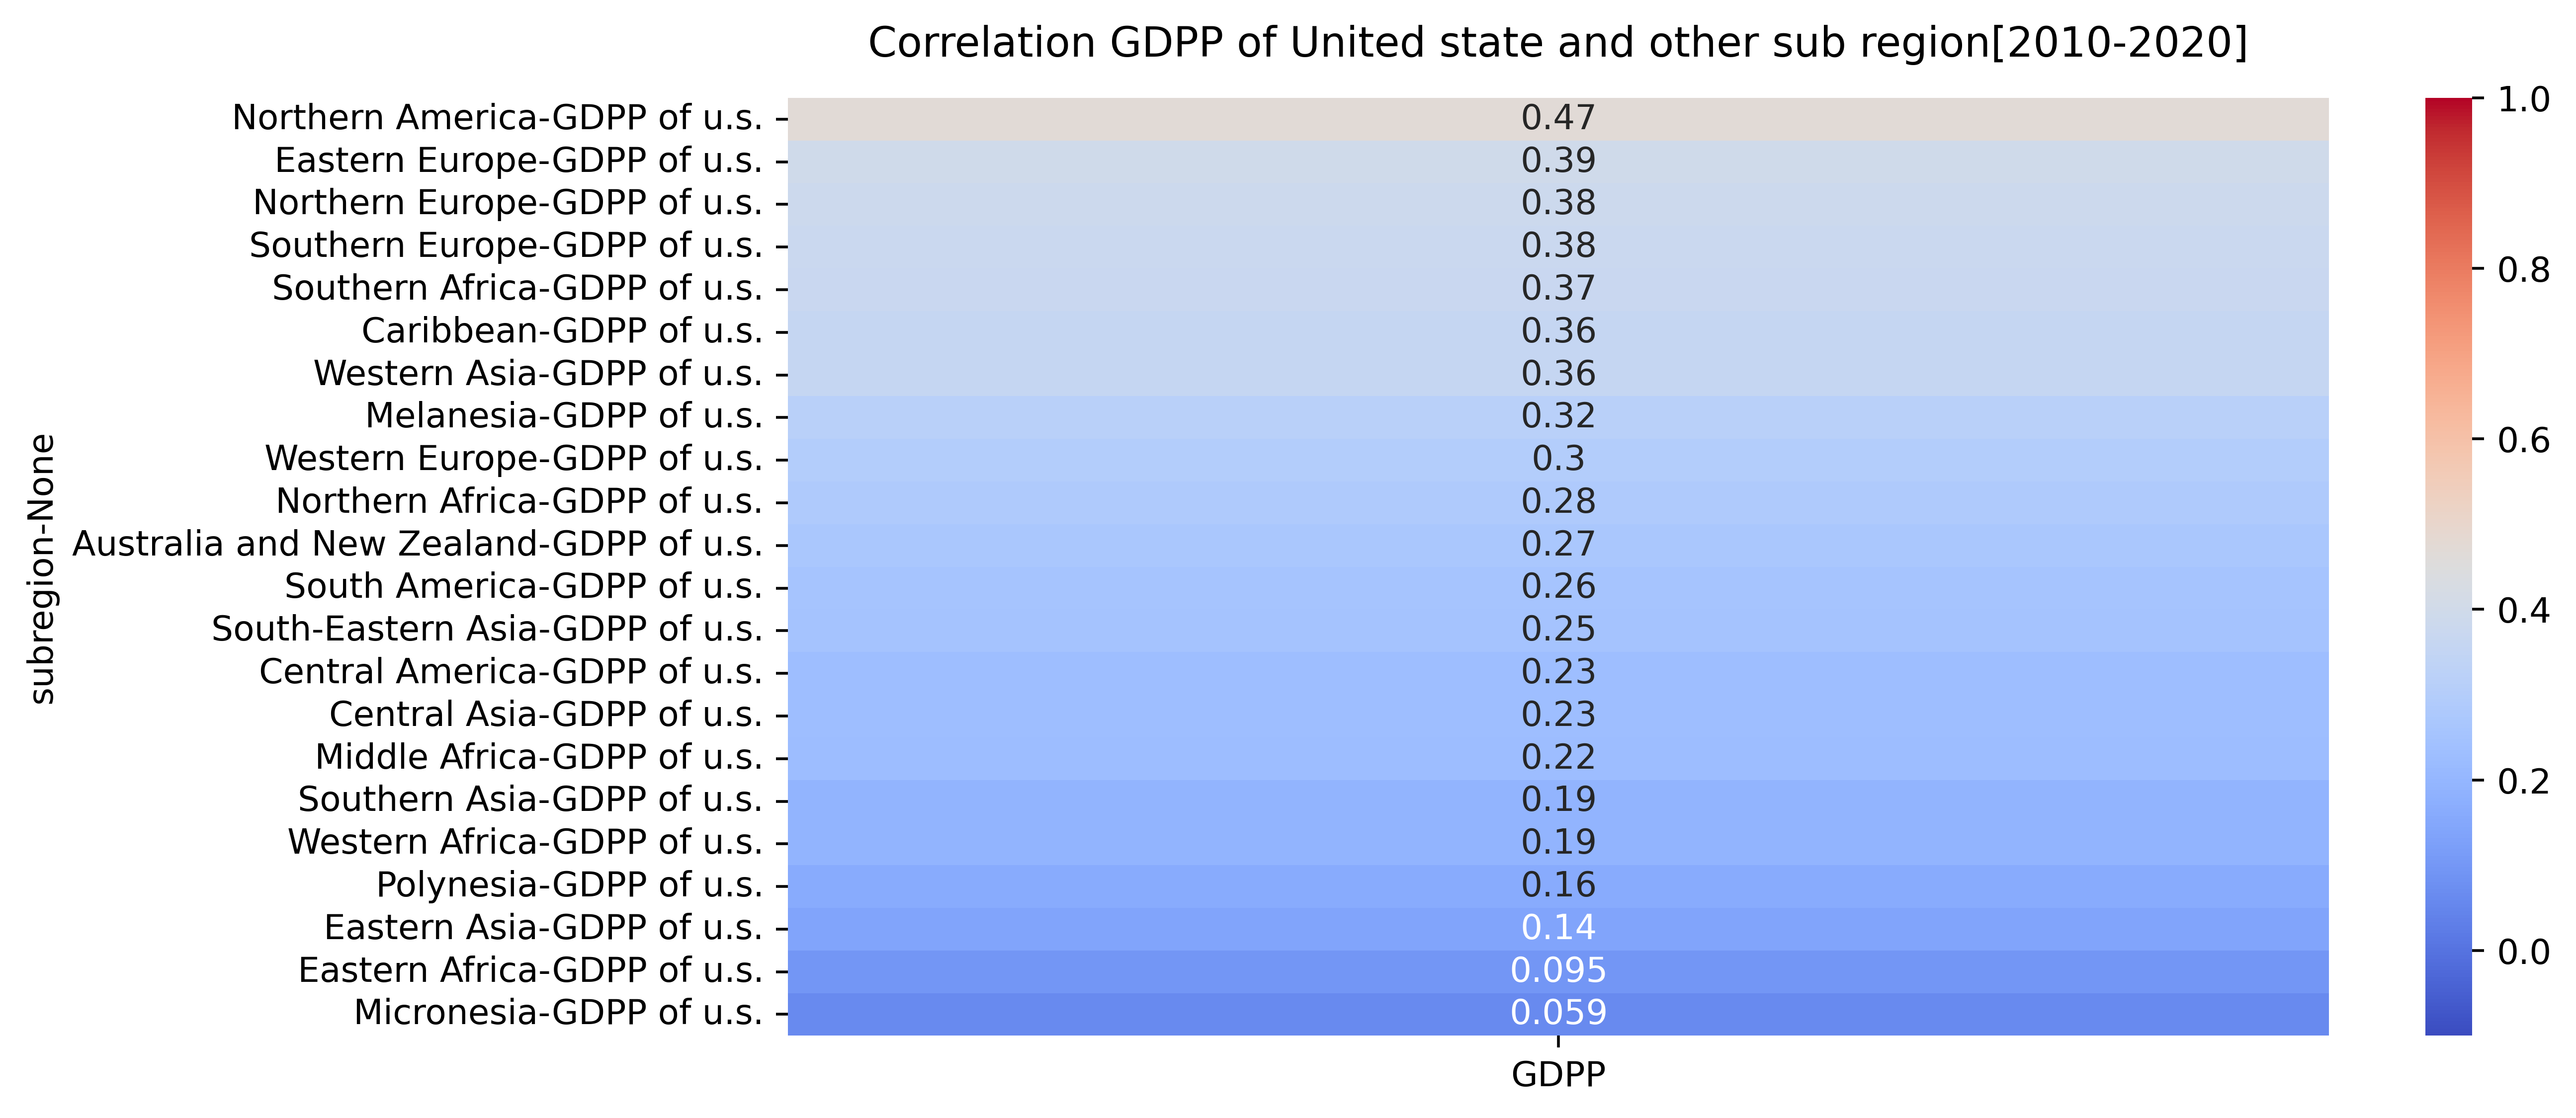

In [88]:
groupby_us_sregion= groupby_us_sregion.loc[ : , ['GDPP'] ] 
groupby_us_sregion = groupby_us_sregion.loc[ groupby_us_sregion['GDPP']!=1] 
groupby_us_sregion=groupby_us_sregion.sort_values(by='GDPP',ascending=False)
plt.figure(figsize=(10, 5),dpi=500)
sns.heatmap(groupby_us_sregion,annot = True, cmap = 'coolwarm',vmin=1, vmax=0)
plt.title('Correlation GDPP of United state and other sub region[2010-2020]', fontdict={'fontsize':12}, pad=12);

# ความสัมพันธ์ของ GDP per capita ของจีน และประเทศอื่นๆ

In [37]:
china = df_gdp.loc[ df_gdp['country']=='china']
inner_china=df_gdp.merge(china, left_on='year', right_on='year')
inner_china = inner_china.merge(df_name,left_on='country_x',right_on='country')
inner_china.columns =['country' , 'year' , 'GDPP' ,'china', 'GDPP of china','country_1','region','subregion' ]
data_types_dict = {'year': str}
inner_china = inner_china.astype(data_types_dict)
groupby_china_country = inner_china.groupby(['country','subregion'])
groupby_china_sregion = inner_china.groupby(['subregion'])

In [38]:
groupby_china_country = groupby_china_country.corr(method ='spearman')
groupby_china_country

GDPP  GDPP of china
country     subregion                                                
afghanistan Southern Asia      GDPP           1.000000       0.532143
                               GDPP of china  0.532143       1.000000
albania     Southern Europe    GDPP           1.000000       0.582143
                               GDPP of china  0.582143       1.000000
algeria     Northern Africa    GDPP           1.000000       0.839286
...                                                ...            ...
vietnam     South-Eastern Asia GDPP of china  0.864286       1.000000
zambia      Eastern Africa     GDPP           1.000000       0.746429
                               GDPP of china  0.746429       1.000000
zimbabwe    Eastern Africa     GDPP           1.000000      -0.035714
                               GDPP of china -0.035714       1.000000

[372 rows x 2 columns]

In [39]:
groupby_china_sregion = groupby_china_sregion.corr(method ='spearman')
groupby_china_sregion

GDPP  GDPP of china
subregion                                                       
Australia and New Zealand GDPP           1.000000       0.632870
                          GDPP of china  0.632870       1.000000
Caribbean                 GDPP           1.000000       0.369811
                          GDPP of china  0.369811       1.000000
Central America           GDPP           1.000000       0.593062
                          GDPP of china  0.593062       1.000000
Central Asia              GDPP           1.000000       0.785857
                          GDPP of china  0.785857       1.000000
Eastern Africa            GDPP           1.000000       0.437284
                          GDPP of china  0.437284       1.000000
Eastern Asia              GDPP           1.000000       0.584160
                          GDPP of china  0.584160       1.000000
Eastern Europe            GDPP           1.000000       0.607129
                          GDPP of china  0.607129       1.000000
Melanesia                 GDPP           1.000000       0.664150
                          GDPP of china  0.664150       1.000000
Micronesia                GDPP           1.000000       0.128924
                          GDPP of china  0.128924       1.000000
Middle Africa             GDPP           1.000000       0.659230
                          GDPP of china  0.659230       1.000000
Northern Africa           GDPP           1.000000       0.540557
                          GDPP of china  0.540557       1.000000
Northern America          GDPP           1.000000       0.416763
                          GDPP of china  0.416763       1.000000
Northern Europe           GDPP           1.000000       0.520796
                          GDPP of china  0.520796       1.000000
Polynesia                 GDPP           1.000000       0.431495
                          GDPP of china  0.431495       1.000000
South America             GDPP           1.000000       0.752851
                          GDPP of china  0.752851       1.000000
South-Eastern Asia        GDPP           1.000000       0.661682
                          GDPP of china  0.661682       1.000000
Southern Africa           GDPP           1.000000       0.516181
                          GDPP of china  0.516181       1.000000
Southern Asia             GDPP           1.000000       0.463993
                          GDPP of china  0.463993       1.000000
Southern Europe           GDPP           1.000000       0.523583
                          GDPP of china  0.523583       1.000000
Western Africa            GDPP           1.000000       0.595489
                          GDPP of china  0.595489       1.000000
Western Asia              GDPP           1.000000       0.759496
                          GDPP of china  0.759496       1.000000
Western Europe            GDPP           1.000000       0.647428
                          GDPP of china  0.647428       1.000000

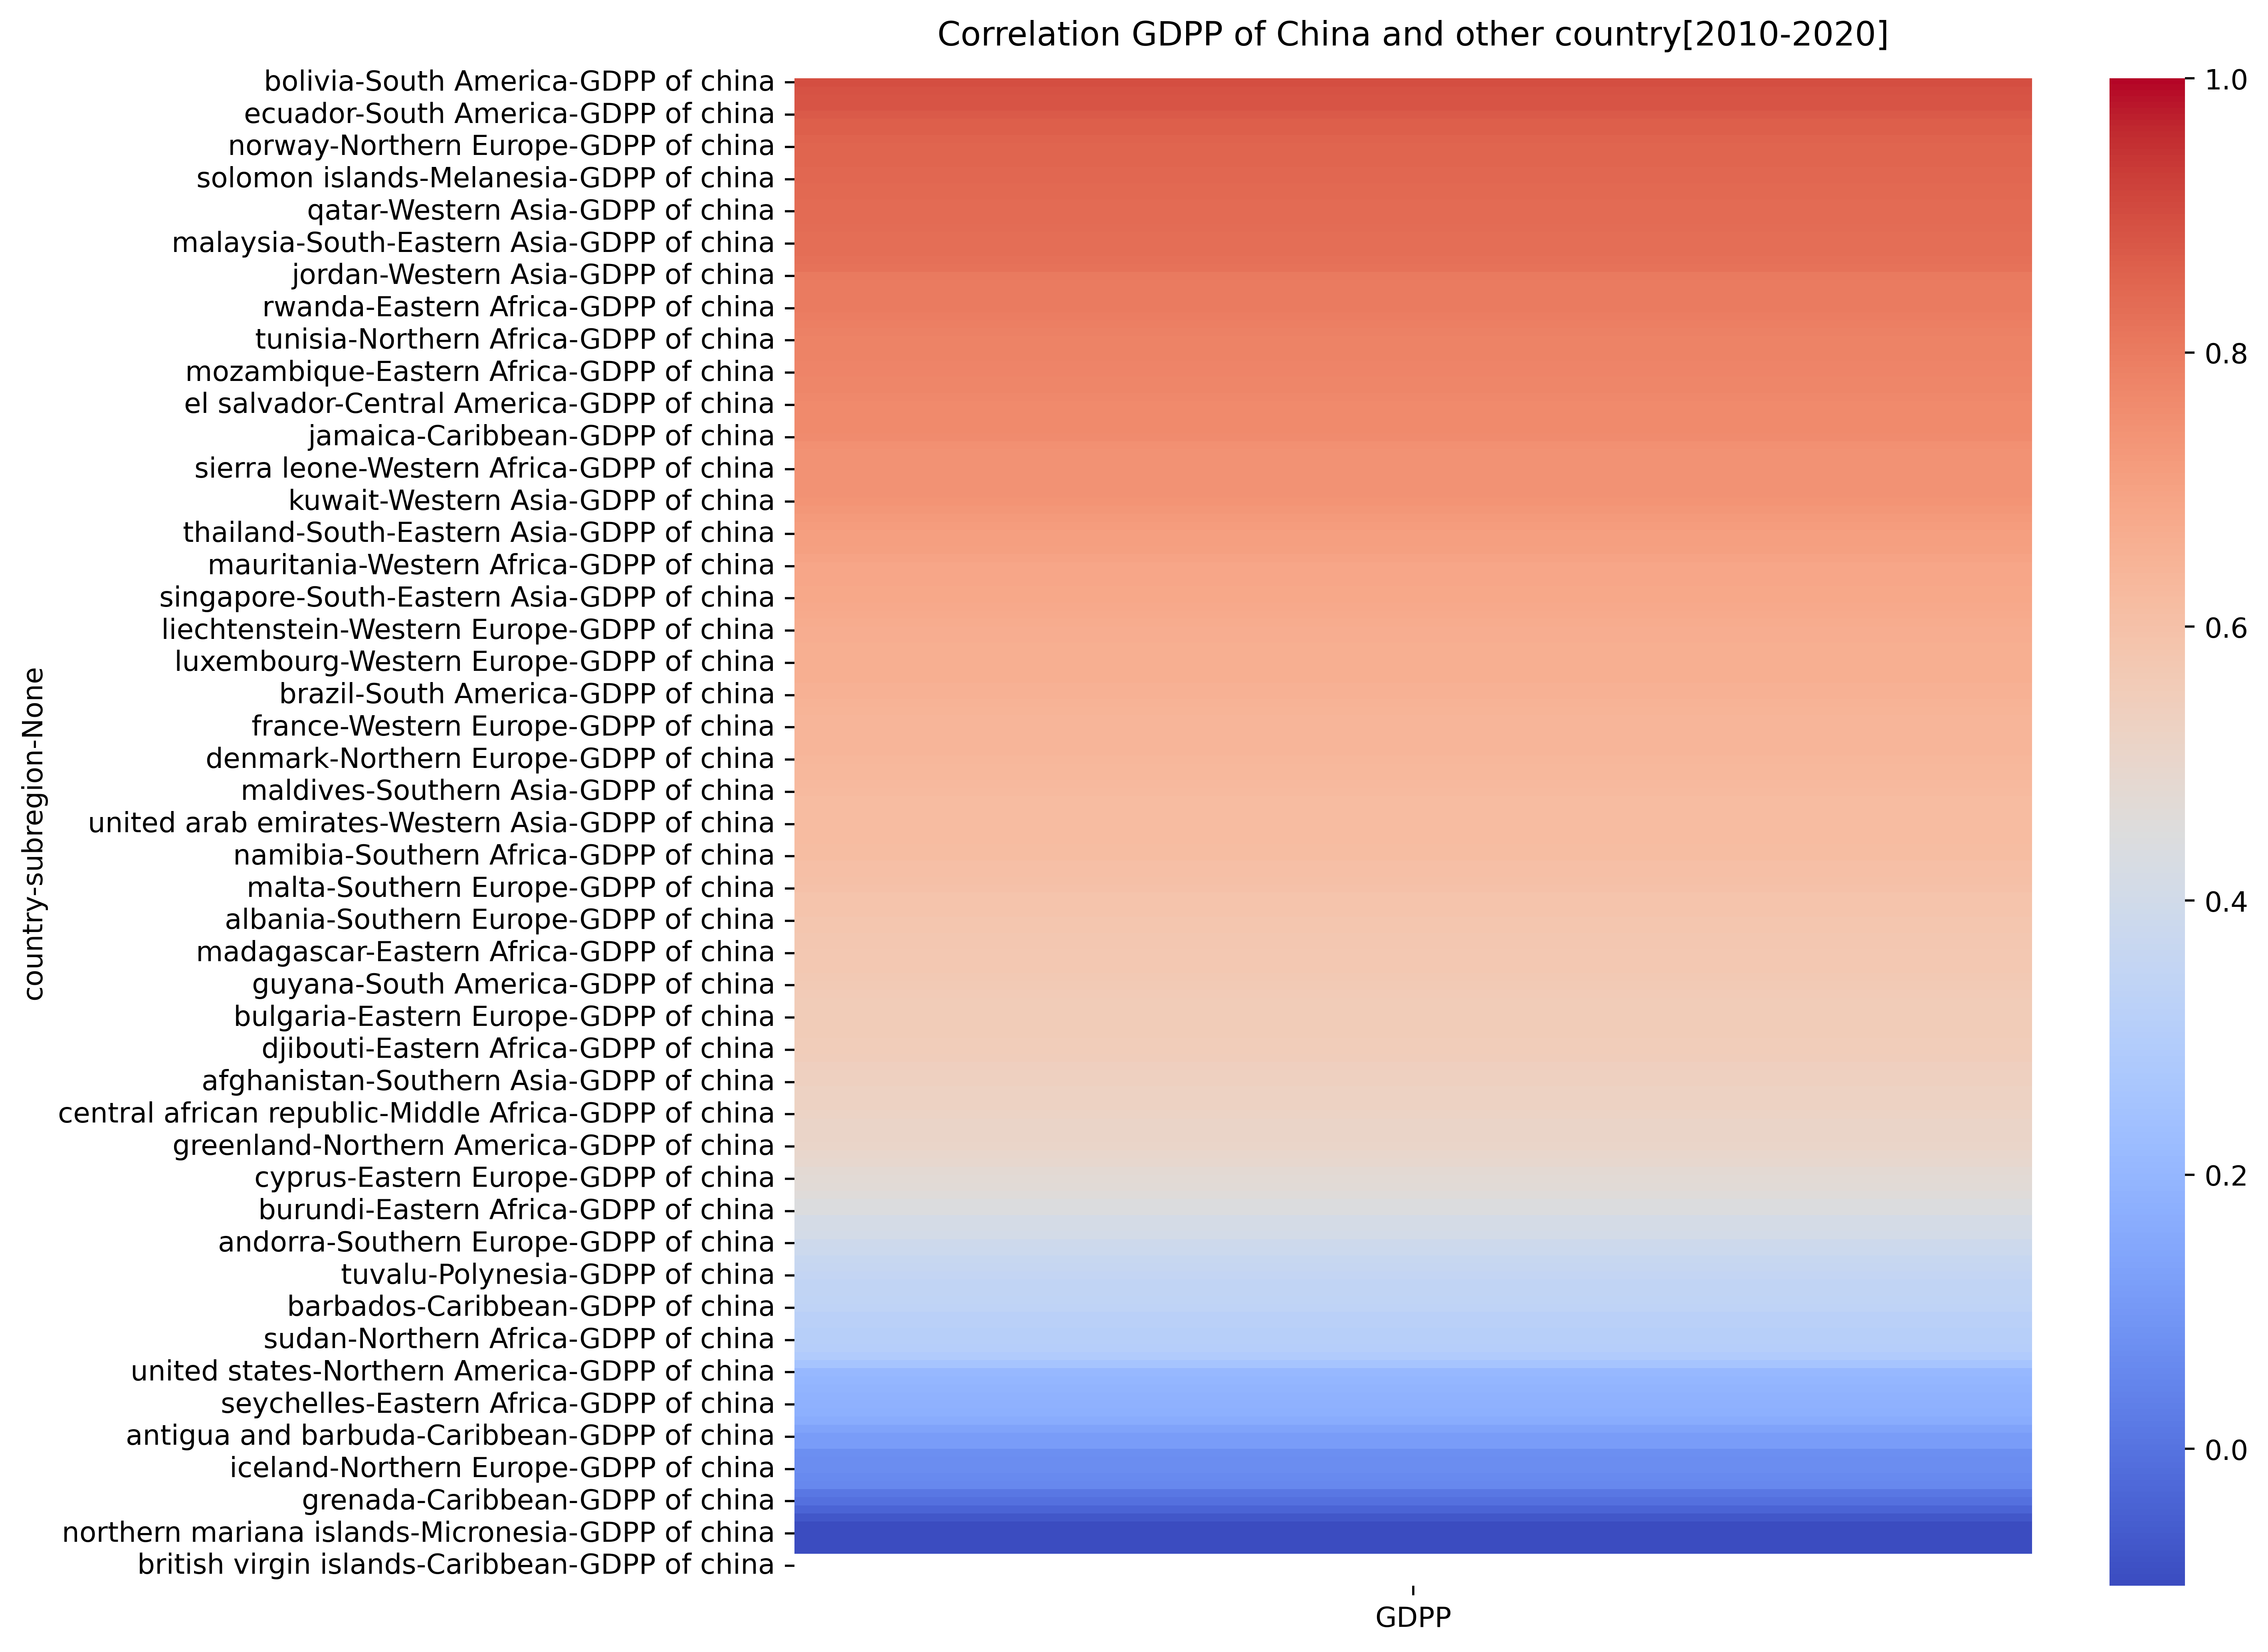

In [89]:
groupby_china_country= groupby_china_country.loc[ : , ['GDPP'] ] 
groupby_china_country = groupby_china_country.loc[ groupby_china_country['GDPP']!=1] 
groupby_china_country=groupby_china_country.sort_values(by='GDPP',ascending=False)
plt.figure(figsize=(10, 10),dpi=500)
sns.heatmap(groupby_china_country, cmap = 'coolwarm',vmin=1, vmax=0)
plt.title('Correlation GDPP of China and other country[2010-2020]', fontdict={'fontsize':12}, pad=12);

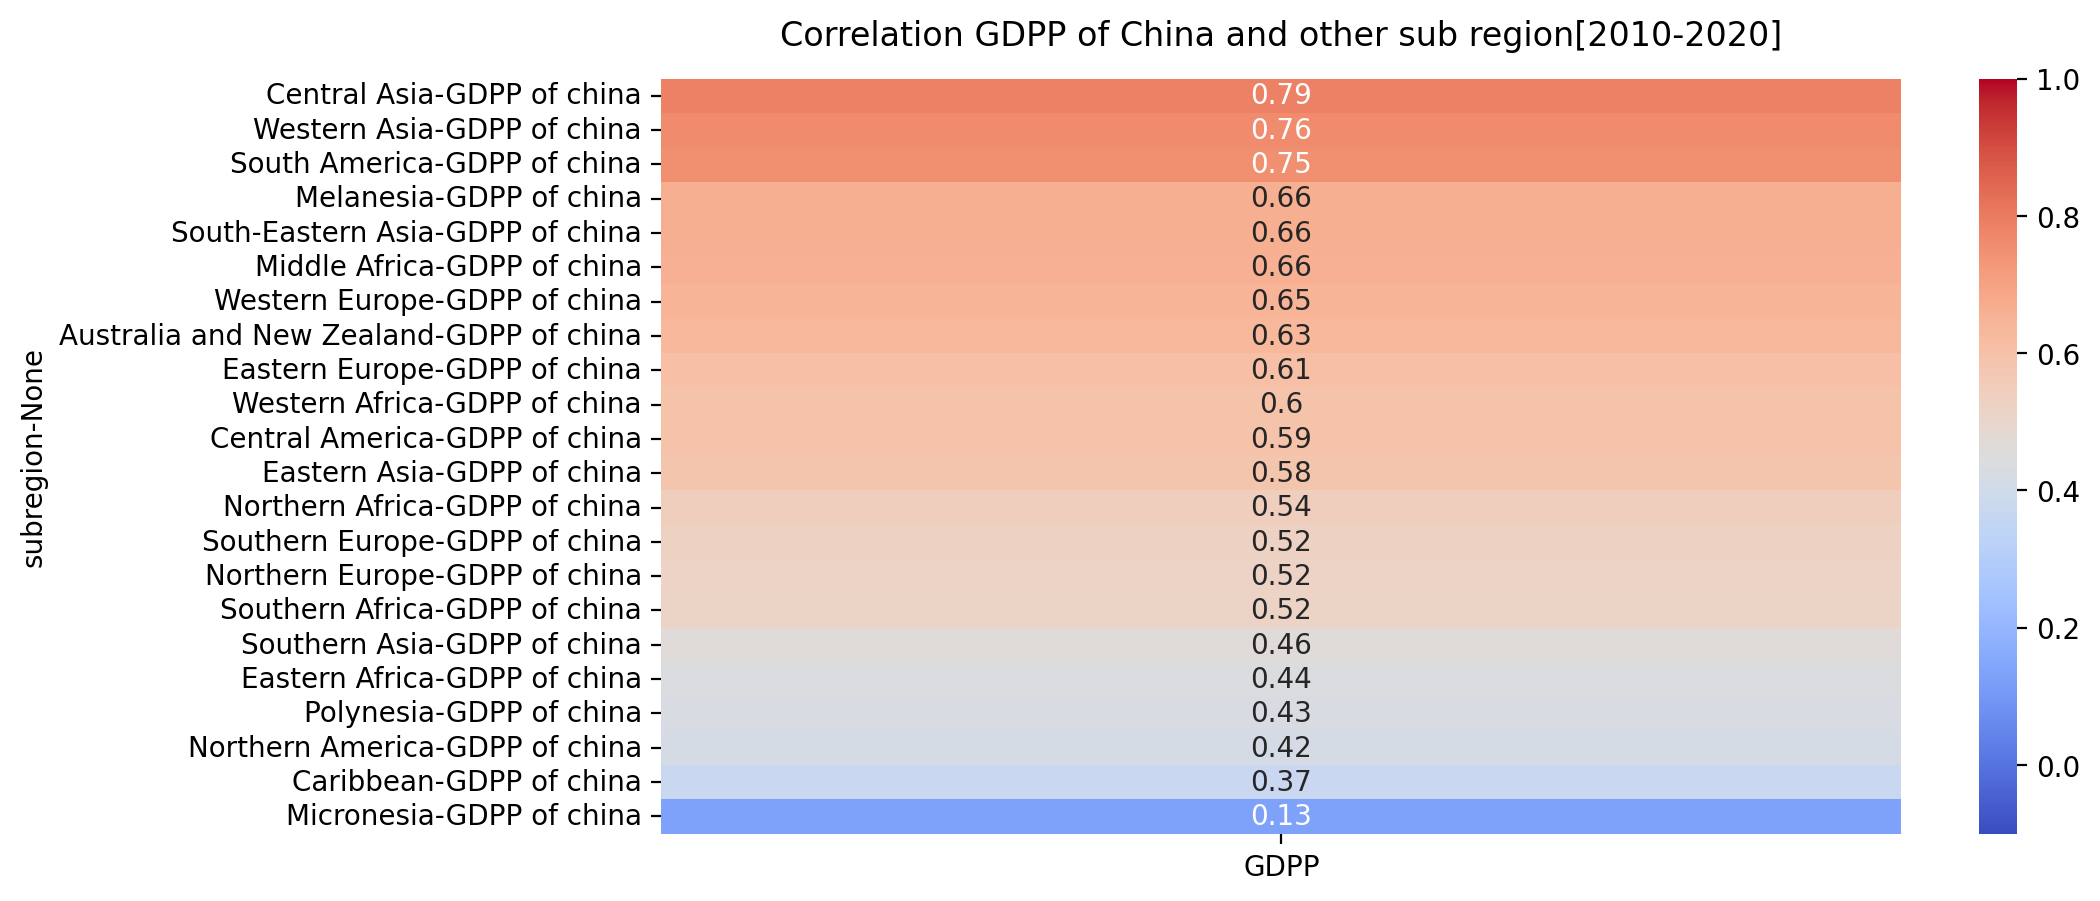

In [90]:
groupby_china_sregion = groupby_china_sregion.loc[ : , ['GDPP'] ] 
groupby_china_sregion = groupby_china_sregion.loc[ groupby_china_sregion['GDPP']!=1] 
groupby_china_sregion=groupby_china_sregion.sort_values(by='GDPP',ascending=False)
plt.figure(figsize=(10, 5),dpi=200)
sns.heatmap(groupby_china_sregion,annot = True, cmap = 'coolwarm',vmin=1, vmax=0)
plt.title('Correlation GDPP of China and other sub region[2010-2020]', fontdict={'fontsize':12}, pad=12);

# สรุปผล และดูผลลัพธ์ 5 อันดับแรก

In [42]:
#เปรียบเทียบ GDPP กับตลาดหุ้นของแต่ละประเทศ
groupby_country.head()

Stock market
country              subregion                         
ghana                Western Africa  GDPP      0.575758
slovenia             Southern Europe GDPP      0.336264
bangladesh           Southern Asia   GDPP      0.321429
united arab emirates Western Asia    GDPP      0.310393
czech republic       Eastern Europe  GDPP      0.239560

In [43]:
#เปรียบเทียบ GDPP กับตลาดหุ้นของแต่ละทวีป
groupby_sregion.head()

Stock market
subregion                                   
Eastern Africa            GDPP      0.145598
Eastern Asia              GDPP      0.111230
Western Asia              GDPP      0.093130
Australia and New Zealand GDPP      0.090654
Western Africa            GDPP      0.086087

In [44]:
#เปรียบเทียบ GDPP ของสหรัฐเทียบกับประเทศอื่น
groupby_us_country.head()

GDPP
country             subregion                             
cayman islands      Caribbean       GDPP of u.s.  0.802198
curacao             Caribbean       GDPP of u.s.  0.766667
guinea              Western Africa  GDPP of u.s.  0.760714
antigua and barbuda Caribbean       GDPP of u.s.  0.703571
united kingdom      Northern Europe GDPP of u.s.  0.671429

In [45]:
#เปรียบเทียบ GDPP ของสหรัฐเทียบกับทวีปอื่น
groupby_us_sregion.head()

GDPP
subregion                              
Northern America GDPP of u.s.  0.468663
Eastern Europe   GDPP of u.s.  0.394634
Northern Europe  GDPP of u.s.  0.384342
Southern Europe  GDPP of u.s.  0.375079
Southern Africa  GDPP of u.s.  0.371633

In [46]:
#เปรียบเทียบ GDPP ของจีนเทียบกับประเทศอื่น
groupby_china_country.head()

GDPP
country    subregion                            
bolivia    South America GDPP of china  0.900000
azerbaijan Western Asia  GDPP of china  0.889286
georgia    Western Asia  GDPP of china  0.885714
iraq       Western Asia  GDPP of china  0.885714
ecuador    South America GDPP of china  0.871429

In [47]:
#เปรียบเทียบ GDPP ของจีนเทียบกับทวีปอื่น
groupby_china_sregion.head()

GDPP
subregion                                 
Central Asia       GDPP of china  0.785857
Western Asia       GDPP of china  0.759496
South America      GDPP of china  0.752851
Melanesia          GDPP of china  0.664150
South-Eastern Asia GDPP of china  0.661682

In [49]:
#เปรียบเทียบตลาดหุ้นของสหรัฐเทียบกับทวีปอื่น
groupbys_us_sregion.head()

Stock market
subregion                                                   
Australia and New Zealand Stock market of u.s.      0.737195
Western Europe            Stock market of u.s.      0.709850
Northern Europe           Stock market of u.s.      0.704891
Northern America          Stock market of u.s.      0.636312
Southern Europe           Stock market of u.s.      0.628078

In [48]:
#เปรียบเทียบตลาดหุ้นของสหรัฐเทียบกับประเทศอื่น
groupbys_us_country.head()

Stock market
country       subregion                                          
united states Northern America Stock market of u.s.      0.944171
switzerland   Western Europe   Stock market of u.s.      0.897177
sweden        Northern Europe  Stock market of u.s.      0.803816
netherlands   Western Europe   Stock market of u.s.      0.791735
norway        Northern Europe  Stock market of u.s.      0.771483

In [50]:
#เปรียบเทียบตลาดหุ้นของจีนเทียบกับทวีปอื่น
groupbys_china_sregion.head()

Stock market
subregion                                                    
Southern Asia             Stock market of china      0.595829
Australia and New Zealand Stock market of china      0.595623
Eastern Asia              Stock market of china      0.575631
Southern Europe           Stock market of china      0.566332
South-Eastern Asia        Stock market of china      0.561908

In [51]:
#เปรียบเทียบตลาดหุ้นของจีนเทียบกับประเทศอื่น
groupbys_china_country.head()

Stock market
country                                     
china    Stock market of china      0.929017
slovenia Stock market of china      0.751159
india    Stock market of china      0.739906
vietnam  Stock market of china      0.719078
israel   Stock market of china      0.704488